**Business Problem**:
To ensure there is no discrimination between employees, it is imperative for the Human Resources
department of Delta Ltd. to maintain a salary range for each employee with similar profiles
Apart from the existing salary, there is a considerable number of factors regarding an employee’s
experience and other abilities to which they get evaluated in interviews. Given the data related to
individuals who applied in Delta Ltd, models can be built that can automatically determine salary
which should be offered if the prospective candidate is selected in the company. This model seeks to
minimize human judgment with regard to salary to be offered.

**Goal & Objective:** The objective of this exercise is to build a model, using historical data that will
determine an employee's salary to be offered, such that manual judgments on selection are
minimized. It is intended to have a robust approach and eliminate any discrimination in salary
among similar employee profiles

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt
%matplotlib inline
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Reading data
data = pd.read_csv('/content/drive/MyDrive/project/Capstone/expected_ctc.csv')

**Checking the dataset**

In [ ]:
data.head()

,IDX,Applicant_ID,Total_Experience,Total_Experience_in_field_applied,Department,Role,Industry,Organization,Designation,Education,...,Curent_Location,Preferred_location,Current_CTC,Inhand_Offer,Last_Appraisal_Rating,No_Of_Companies_worked,Number_of_Publications,Certifications,International_degree_any,Expected_CTC
0,1,22753,0,0,NaN,NaN,NaN,NaN,NaN,PG,...,Guwahati,Pune,0,N,NaN,0,0,0,0,384551
1,2,51087,23,14,HR,Consultant,Analytics,H,HR,Doctorate,...,Bangalore,Nagpur,2702664,Y,Key_Performer,2,4,0,0,3783729
2,3,38413,21,12,Top Management,Consultant,Training,J,NaN,Doctorate,...,Ahmedabad,Jaipur,2236661,Y,Key_Performer,5,3,0,0,3131325
3,4,11501,15,8,Banking,Financial Analyst,Aviation,F,HR,Doctorate,...,Kanpur,Kolkata,2100510,N,C,5,3,0,0,2608833
4,5,58941,10,5,Sales,Project Manager,Insurance,E,Medical Officer,Grad,...,Ahmedabad,Ahmedabad,1931644,N,C,2,3,0,0,2221390


In [ ]:
data.shape

(25000, 29)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 29 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   IDX                                25000 non-null  int64  
 1   Applicant_ID                       25000 non-null  int64  
 2   Total_Experience                   25000 non-null  int64  
 3   Total_Experience_in_field_applied  25000 non-null  int64  
 4   Department                         22222 non-null  object 
 5   Role                               24037 non-null  object 
 6   Industry                           24092 non-null  object 
 7   Organization                       24092 non-null  object 
 8   Designation                        21871 non-null  object 
 9   Education                          25000 non-null  object 
 10  Graduation_Specialization          18820 non-null  object 
 11  University_Grad                    18820 non-null  obj

In [ ]:
data.isnull().sum()

IDX                                      0
Applicant_ID                             0
Total_Experience                         0
Total_Experience_in_field_applied        0
Department                            2778
Role                                   963
Industry                               908
Organization                           908
Designation                           3129
Education                                0
Graduation_Specialization             6180
University_Grad                       6180
Passing_Year_Of_Graduation            6180
PG_Specialization                     7692
University_PG                         7692
Passing_Year_Of_PG                    7692
PHD_Specialization                   11881
University_PHD                       11881
Passing_Year_Of_PHD                  11881
Curent_Location                          0
Preferred_location                       0
Current_CTC                              0
Inhand_Offer                             0
Last_Apprai

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
IDX,25000.0,1.250050e+04,7.217023e+03,1.0,6250.75,12500.5,18750.25,25000.0
Applicant_ID,25000.0,3.499324e+04,1.439027e+04,10000.0,22563.75,34974.5,47419.00,60000.0
Total_Experience,25000.0,1.249308e+01,7.471398e+00,0.0,6.00,12.0,19.00,25.0
Total_Experience_in_field_applied,25000.0,6.258200e+00,5.819513e+00,0.0,1.00,5.0,10.00,25.0
Passing_Year_Of_Graduation,18820.0,2.002194e+03,8.316640e+00,1986.0,1996.00,2002.0,2009.00,2020.0
Passing_Year_Of_PG,17308.0,2.005154e+03,9.022963e+00,1988.0,1997.00,2006.0,2012.00,2023.0
Passing_Year_Of_PHD,13119.0,2.007396e+03,7.493601e+00,1995.0,2001.00,2007.0,2014.00,2020.0
Current_CTC,25000.0,1.760945e+06,9.202125e+05,0.0,1027311.50,1802567.5,2443883.25,3999693.0
No_Of_Companies_worked,25000.0,3.482040e+00,1.690335e+00,0.0,2.00,3.0,5.00,6.0
Number_of_Publications,25000.0,4.089040e+00,2.606612e+00,0.0,2.00,4.0,6.00,8.0


In [ ]:
df =data.drop(['IDX','Applicant_ID','Organization','Graduation_Specialization',
       'University_Grad', 'Passing_Year_Of_Graduation', 'PG_Specialization',
       'University_PG', 'Passing_Year_Of_PG', 'PHD_Specialization',
       'University_PHD', 'Passing_Year_Of_PHD'], axis = 1, inplace = True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 17 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Total_Experience                   25000 non-null  int64 
 1   Total_Experience_in_field_applied  25000 non-null  int64 
 2   Department                         22222 non-null  object
 3   Role                               24037 non-null  object
 4   Industry                           24092 non-null  object
 5   Designation                        21871 non-null  object
 6   Education                          25000 non-null  object
 7   Curent_Location                    25000 non-null  object
 8   Preferred_location                 25000 non-null  object
 9   Current_CTC                        25000 non-null  int64 
 10  Inhand_Offer                       25000 non-null  object
 11  Last_Appraisal_Rating              24092 non-null  object
 12  No_O

In [ ]:
data.isnull().sum()

Total_Experience                        0
Total_Experience_in_field_applied       0
Department                           2778
Role                                  963
Industry                              908
Designation                          3129
Education                               0
Curent_Location                         0
Preferred_location                      0
Current_CTC                             0
Inhand_Offer                            0
Last_Appraisal_Rating                 908
No_Of_Companies_worked                  0
Number_of_Publications                  0
Certifications                          0
International_degree_any                0
Expected_CTC                            0
dtype: int64

In [ ]:
data.Department.value_counts()

Marketing         2379
Analytics/BI      2096
Healthcare        2062
Others            2041
Sales             1991
HR                1988
Banking           1952
Education         1948
Engineering       1937
Top Management    1632
Accounts          1118
IT-Software       1078
Name: Department, dtype: int64

In [ ]:
data.Role.value_counts()

Others                  2248
Bio statistician        1913
Analyst                 1892
Project Manager         1850
Team Lead               1833
Consultant              1780
Business Analyst        1711
Sales Execituve         1574
Sales Manager           1427
Senior Researcher       1236
Financial Analyst       1182
CEO                     1149
Scientist               1139
Head                    1108
Associate                767
Data scientist           363
Principal Analyst        275
Area Sales Manager       134
Senior Analyst           128
Researcher               123
Sr. Business Analyst     114
Professor                 33
Research Scientist        33
Lab Executuve             25
Name: Role, dtype: int64

In [ ]:
data.Industry.value_counts()

Training      2237
IT            2228
Insurance     2219
BFSI          2207
Automobile    2202
Analytics     2201
Retail        2195
Telecom       2190
Aviation      2183
FMCG          2180
Others        2050
Name: Industry, dtype: int64

In [ ]:
data.Designation.value_counts()

HR                    1648
Others                1647
Manager               1628
Product Manager       1626
Sr.Manager            1617
Consultant            1606
Marketing Manager     1590
Assistant Manager     1590
Data Analyst          1575
Research Analyst      1563
Medical Officer       1047
Software Developer     914
Web Designer           882
Network Engineer       862
Director               772
CA                     715
Research Scientist     537
Scientist               52
Name: Designation, dtype: int64

In [ ]:
data.Education.value_counts()

PG            6326
Doctorate     6285
Grad          6209
Under Grad    6180
Name: Education, dtype: int64

In [ ]:
data.Last_Appraisal_Rating.value_counts()

B                5501
D                4917
C                4812
A                4671
Key_Performer    4191
Name: Last_Appraisal_Rating, dtype: int64

In [ ]:
data.Inhand_Offer.value_counts()

N    17418
Y     7582
Name: Inhand_Offer, dtype: int64

In [ ]:
data.Last_Appraisal_Rating.value_counts()

B                5501
D                4917
C                4812
A                4671
Key_Performer    4191
Name: Last_Appraisal_Rating, dtype: int64

In [ ]:
data.duplicated().sum()

0

In [ ]:
data['Industry']= data['Industry'].fillna('Freshers')

In [ ]:
data['Last_Appraisal_Rating']= data['Last_Appraisal_Rating'].fillna('Freshers')

In [ ]:
data['Department']= data['Department'].fillna('Others')

In [ ]:
data['Designation']= data['Designation'].fillna('Others')

In [ ]:
data['Role']= data['Role'].fillna('Others')

In [ ]:
data.isnull().sum()

Total_Experience                     0
Total_Experience_in_field_applied    0
Department                           0
Role                                 0
Industry                             0
Designation                          0
Education                            0
Curent_Location                      0
Preferred_location                   0
Current_CTC                          0
Inhand_Offer                         0
Last_Appraisal_Rating                0
No_Of_Companies_worked               0
Number_of_Publications               0
Certifications                       0
International_degree_any             0
Expected_CTC                         0
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 17 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Total_Experience                   25000 non-null  int64 
 1   Total_Experience_in_field_applied  25000 non-null  int64 
 2   Department                         25000 non-null  object
 3   Role                               25000 non-null  object
 4   Industry                           25000 non-null  object
 5   Designation                        25000 non-null  object
 6   Education                          25000 non-null  object
 7   Curent_Location                    25000 non-null  object
 8   Preferred_location                 25000 non-null  object
 9   Current_CTC                        25000 non-null  int64 
 10  Inhand_Offer                       25000 non-null  object
 11  Last_Appraisal_Rating              25000 non-null  object
 12  No_O

In [ ]:
data['No_Of_Companies_worked'] = pd.Categorical(data['No_Of_Companies_worked'])

In [ ]:
data['International_degree_any'] = pd.Categorical(data['International_degree_any'])

In [ ]:
data['Inhand_Offer'] = pd.Categorical(data['Inhand_Offer'])

In [ ]:
data['Inhand_Offer'] = data['Inhand_Offer'].cat.codes

In [ ]:
data.Inhand_Offer.value_counts()

0    17418
1     7582
Name: Inhand_Offer, dtype: int64

In [ ]:
data.International_degree_any.value_counts()

0    22957
1     2043
Name: International_degree_any, dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 17 columns):
 #   Column                             Non-Null Count  Dtype   
---  ------                             --------------  -----   
 0   Total_Experience                   25000 non-null  int64   
 1   Total_Experience_in_field_applied  25000 non-null  int64   
 2   Department                         25000 non-null  object  
 3   Role                               25000 non-null  object  
 4   Industry                           25000 non-null  object  
 5   Designation                        25000 non-null  object  
 6   Education                          25000 non-null  object  
 7   Curent_Location                    25000 non-null  object  
 8   Preferred_location                 25000 non-null  object  
 9   Current_CTC                        25000 non-null  int64   
 10  Inhand_Offer                       25000 non-null  int8    
 11  Last_Appraisal_Rating              25000 

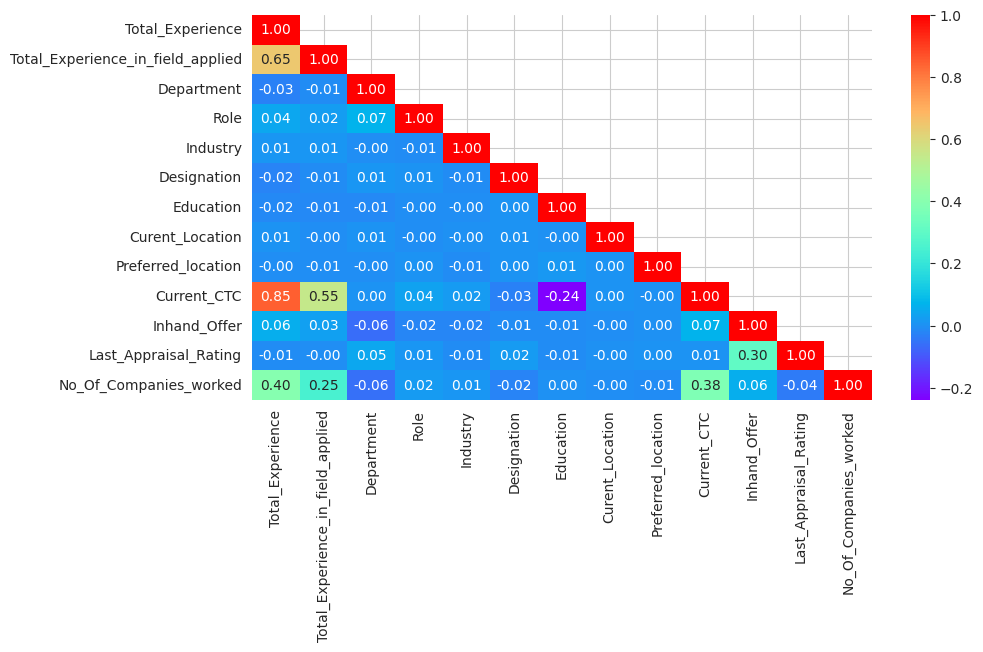

In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(data.iloc[:,0:13].corr(),annot=True,fmt='.2f',cmap='rainbow',mask=np.triu(data.iloc[:,0:13].corr(),+1))
plt.show()

# Univariate Analysis

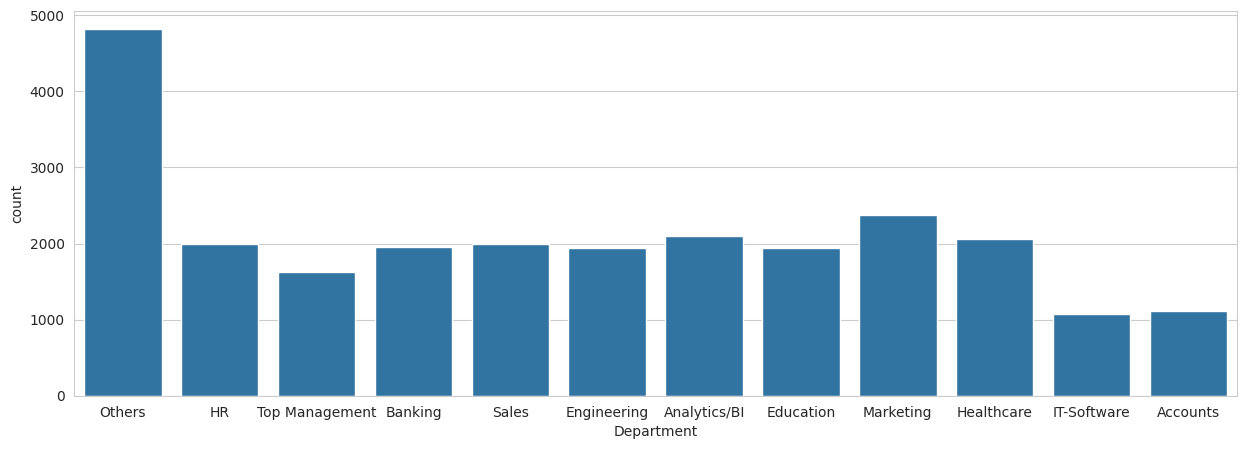

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot(x='Department', data=data, palette=None)
plt.show()

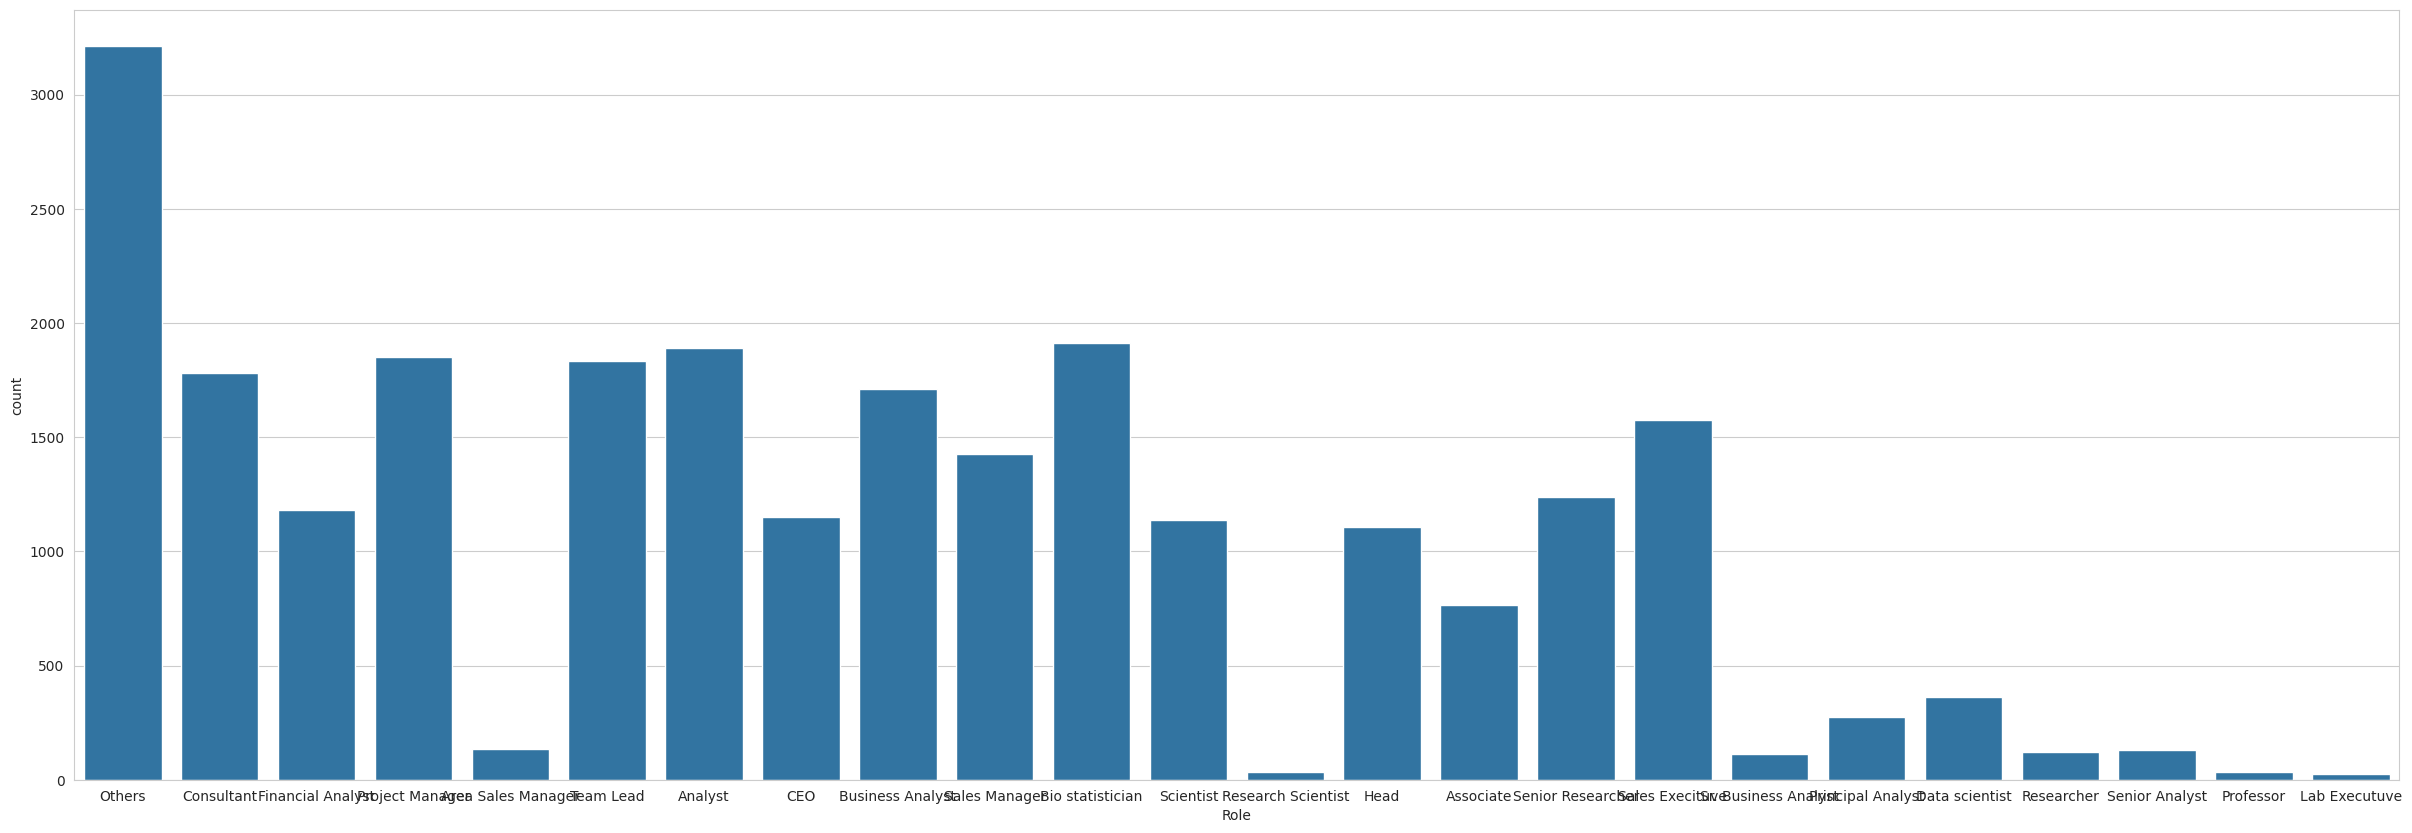

In [ ]:
plt.figure(figsize=(30,10))
sns.countplot(x='Role', data=data, palette=None)
plt.show()

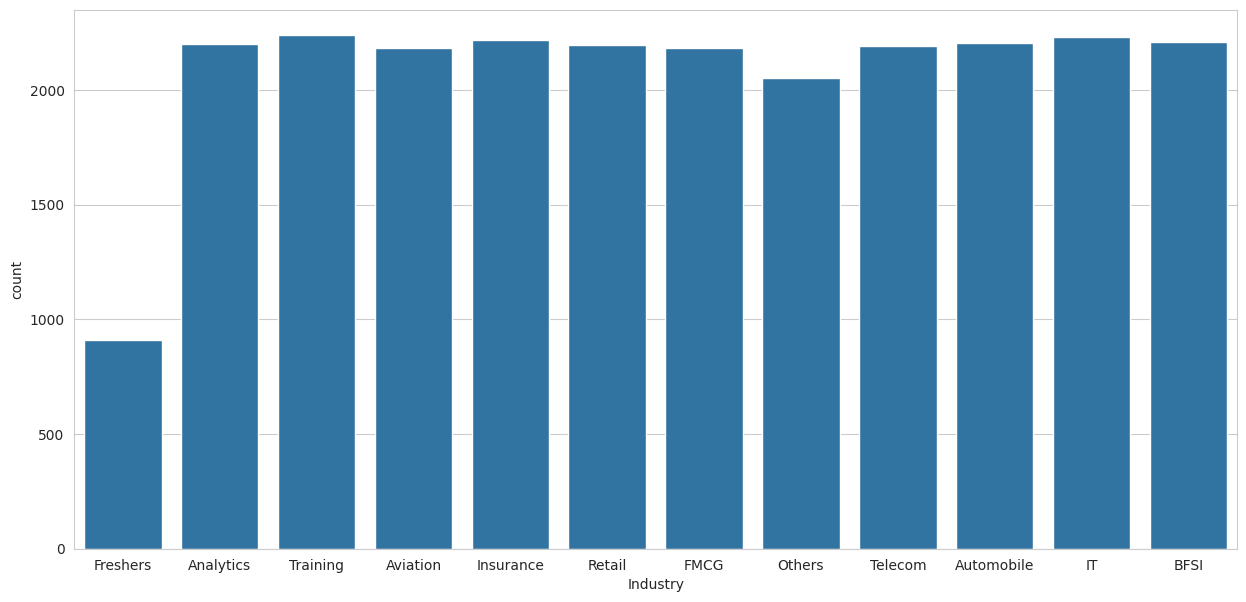

In [ ]:
plt.figure(figsize=(15,7))
sns.countplot(x='Industry', data=data, palette=None)
plt.show()

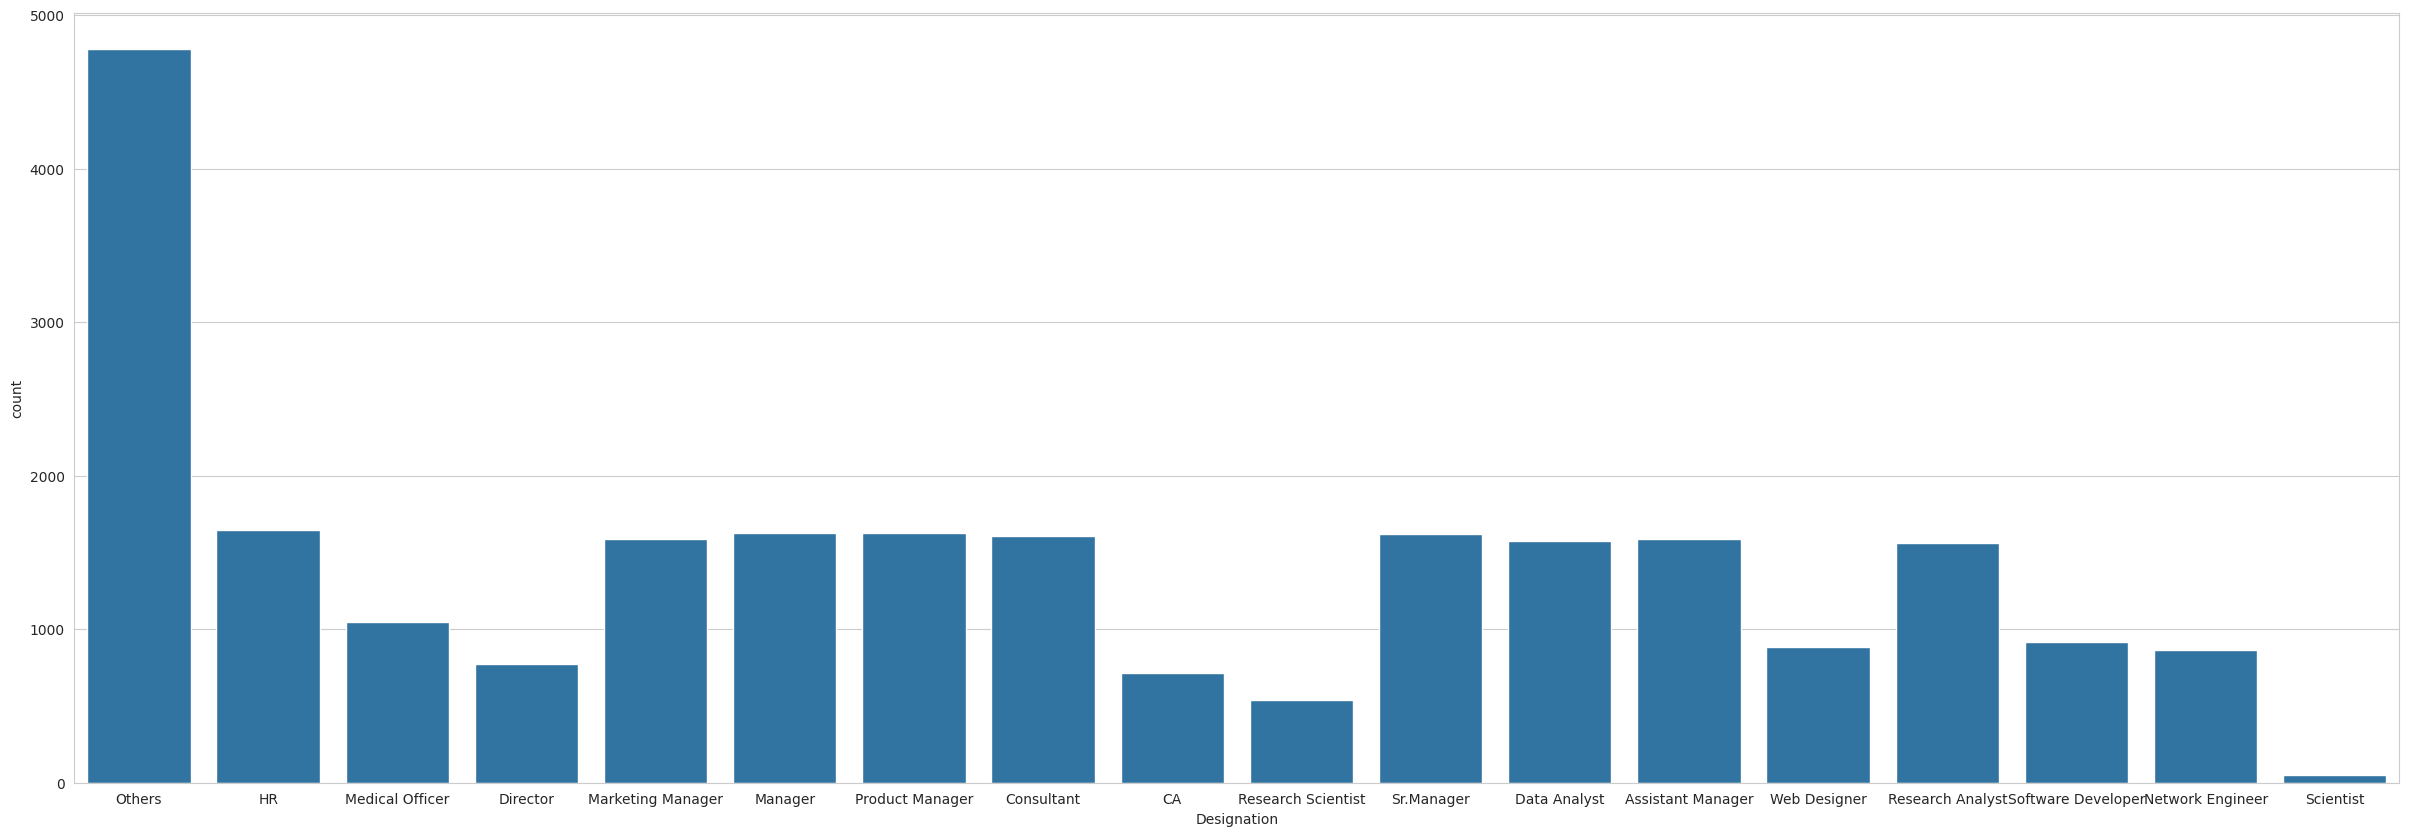

In [ ]:
plt.figure(figsize=(30,10))
sns.countplot(x='Designation', data=data, palette=None)
plt.show()

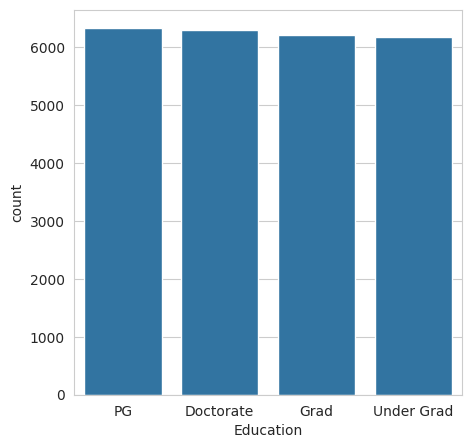

In [ ]:
plt.figure(figsize=(5,5))
sns.countplot(x='Education', data=data, palette=None)
plt.show()

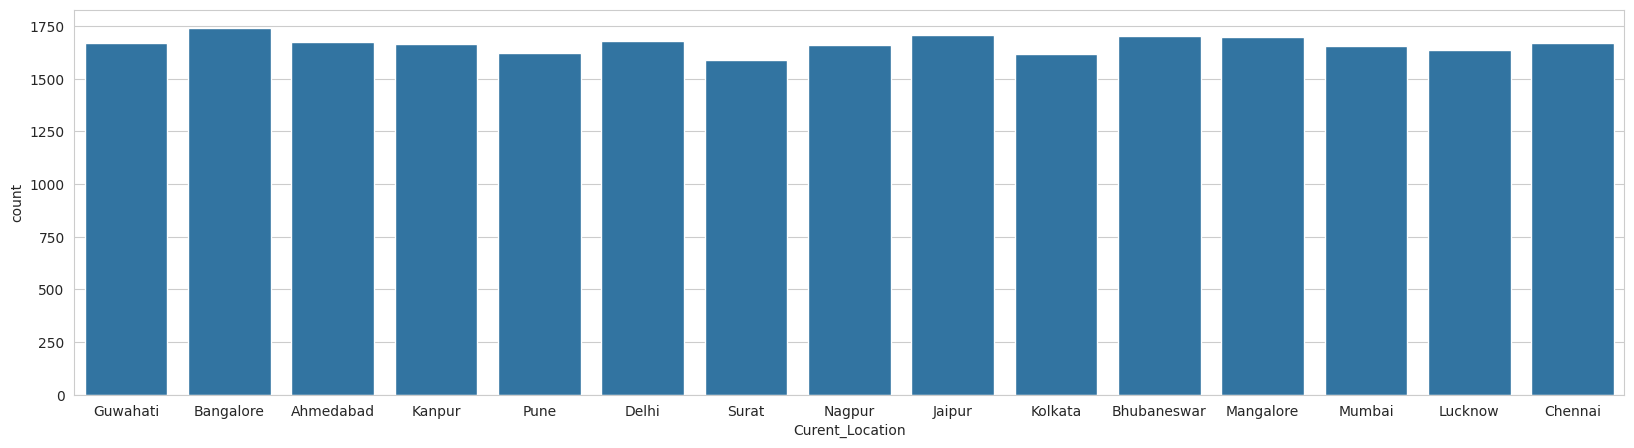

In [ ]:
plt.figure(figsize=(20,5))
sns.countplot(x='Curent_Location', data=data, palette=None)
plt.show()

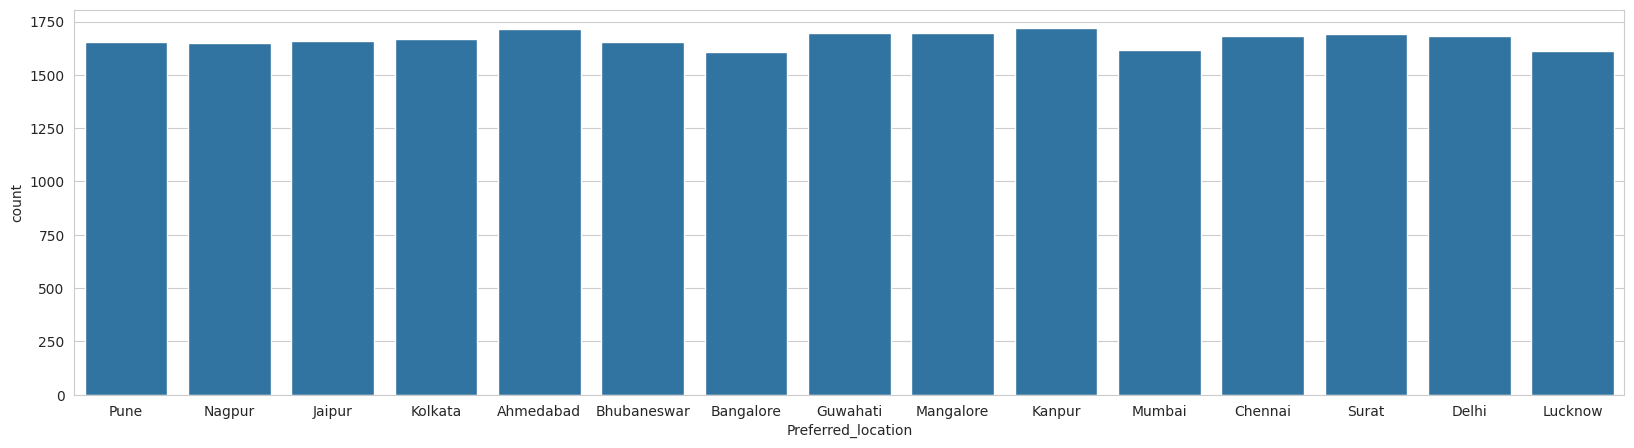

In [ ]:
plt.figure(figsize=(20,5))
sns.countplot(x='Preferred_location', data=data, palette=None)
plt.show()

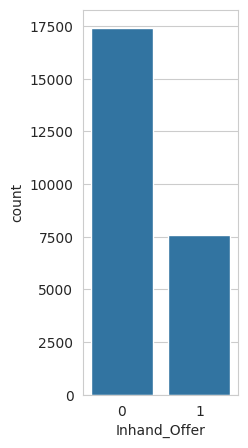

In [ ]:
plt.figure(figsize=(2,5))
sns.countplot(x='Inhand_Offer', data=data, palette=None)
plt.show()

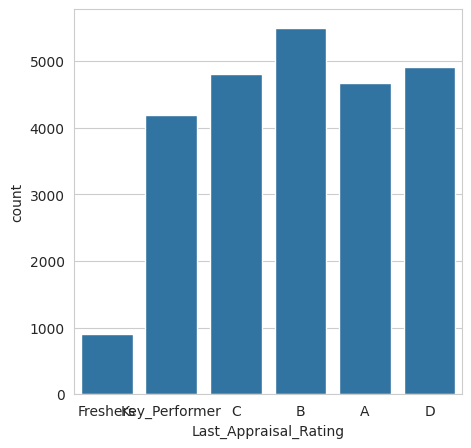

In [ ]:
plt.figure(figsize=(5,5))
sns.countplot(x='Last_Appraisal_Rating', data=data, palette=None)
plt.show()

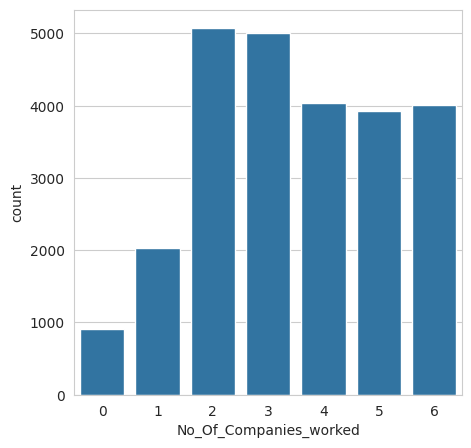

In [ ]:
plt.figure(figsize=(5,5))
sns.countplot(x='No_Of_Companies_worked', data=data, palette=None)
plt.show()

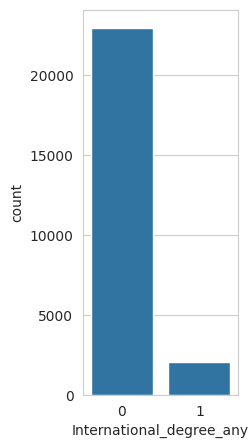

In [ ]:
plt.figure(figsize=(2,5))
sns.countplot(x='International_degree_any', data=data, palette=None)
plt.show()

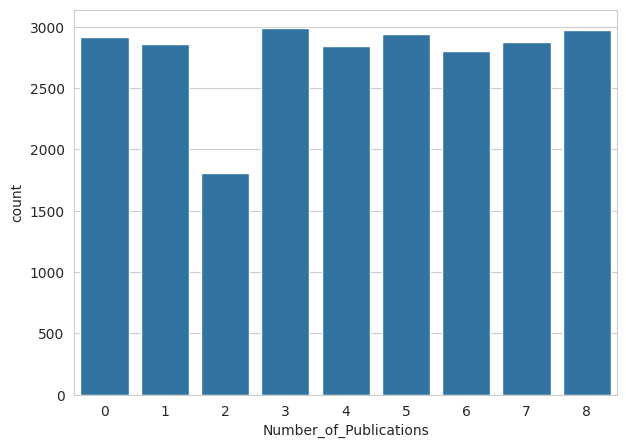

In [ ]:
plt.figure(figsize=(7,5))
sns.countplot(x='Number_of_Publications', data=data, palette=None)
plt.show()

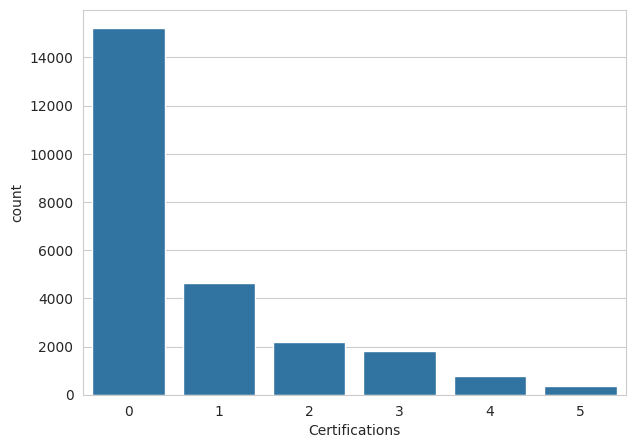

In [ ]:
plt.figure(figsize=(7,5))
sns.countplot(x='Certifications', data=data, palette=None)
plt.show()

In [ ]:
data.International_degree_any.value_counts()

0    22957
1     2043
Name: International_degree_any, dtype: int64

In [ ]:
df=data.drop(['Department','Role', 'Industry', 'Designation', 'Education', 'Curent_Location',
       'Preferred_location','Inhand_Offer','Last_Appraisal_Rating', 'No_Of_Companies_worked',
       'Number_of_Publications', 'Certifications', 'International_degree_any'], axis = 1)

# Bivariate Analysis

Total_Experience_in_field_applied
Skew : 0.96


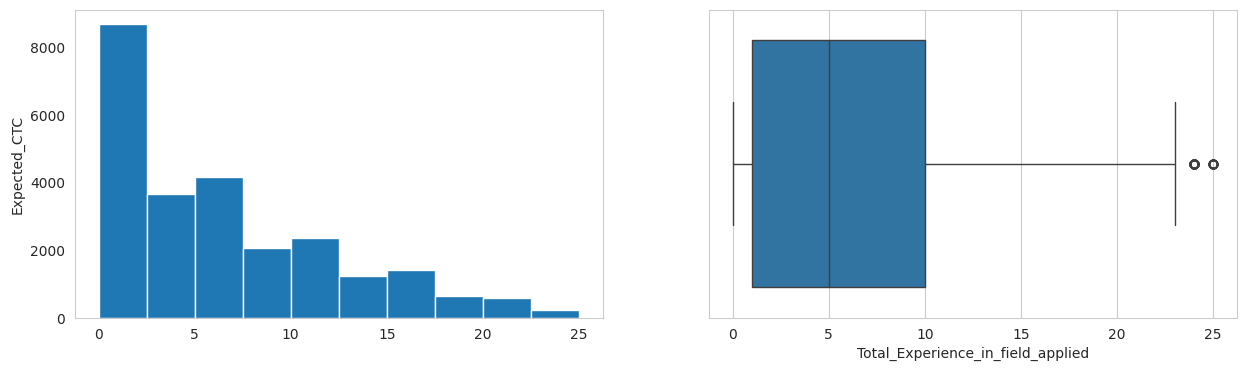

Current_CTC
Skew : 0.1


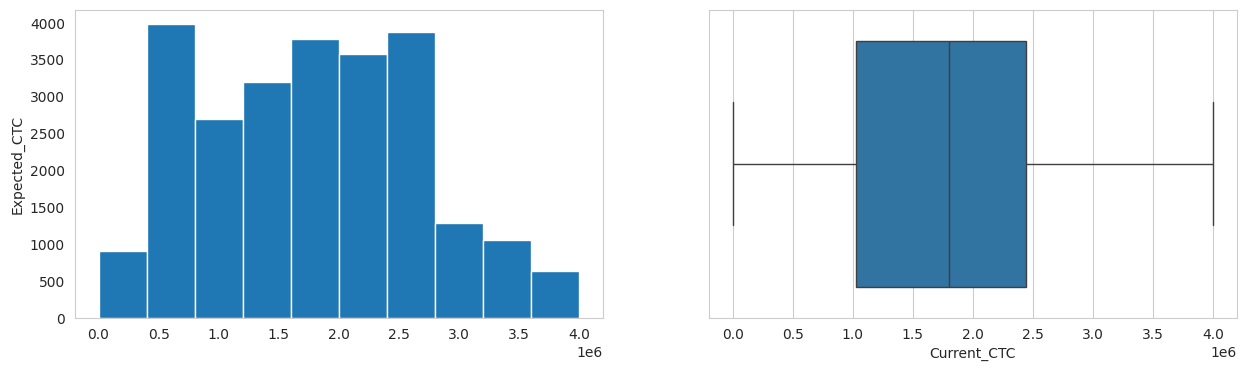

Expected_CTC
Skew : 0.33


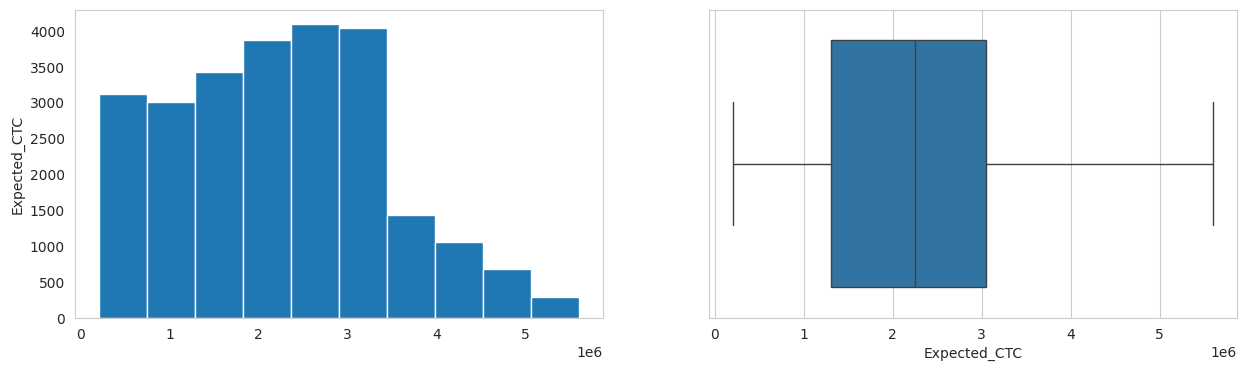

In [ ]:
for col in df.columns[1:]:
    print(col)
    print('Skew :',round(df[col].skew(),2))
    plt.figure(figsize=(15,4))
    plt.subplot(1,2,1)
    df[col].hist(bins=10, grid=False)
    plt.ylabel('Expected_CTC')
    plt.subplot(1,2,2)
    sns.boxplot(x=df[col])
    plt.show()

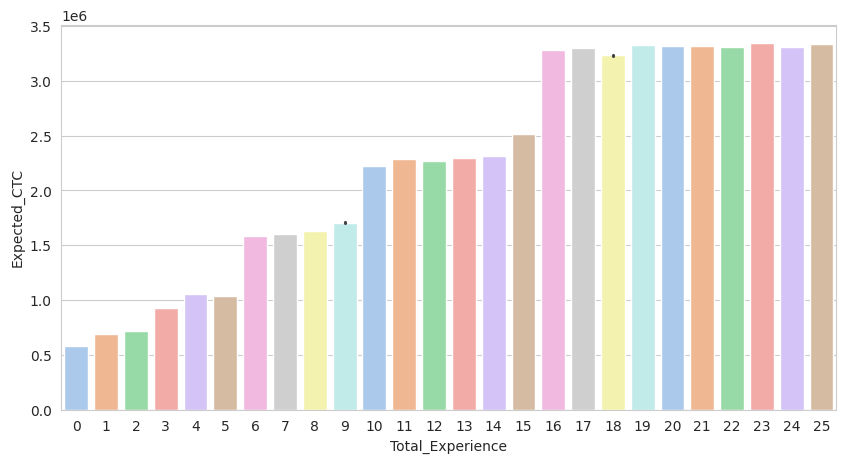

In [ ]:
plt.figure(figsize=(10,5))
ax=sns.barplot(x=df['Total_Experience'],y=df['Expected_CTC'],ci=True,palette='pastel')
plt.show()

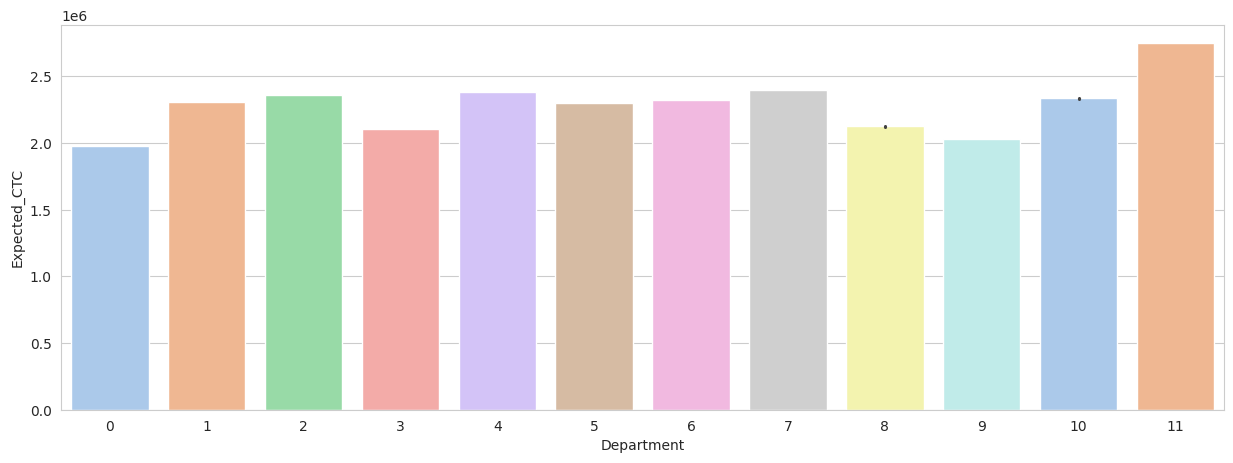

In [ ]:
plt.figure(figsize=(15,5))
ax=sns.barplot(x=data['Department'],y=data['Expected_CTC'],ci=True,palette='pastel')
plt.show()

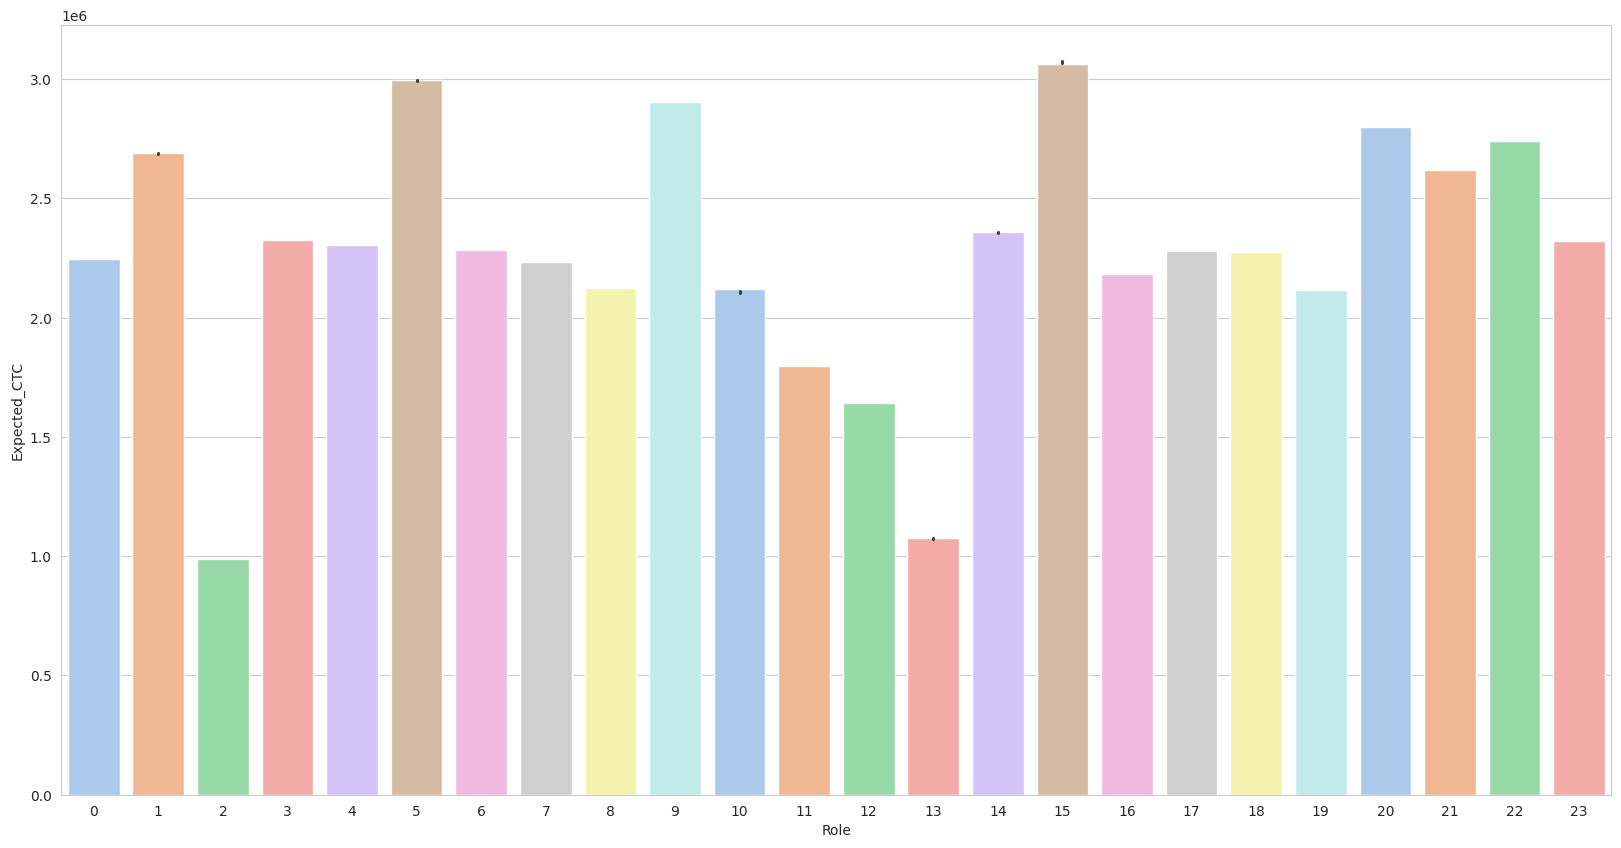

In [ ]:
plt.figure(figsize=(20,10))
ax=sns.barplot(x=data['Role'],y=data['Expected_CTC'],ci=True,palette='pastel')
plt.show()

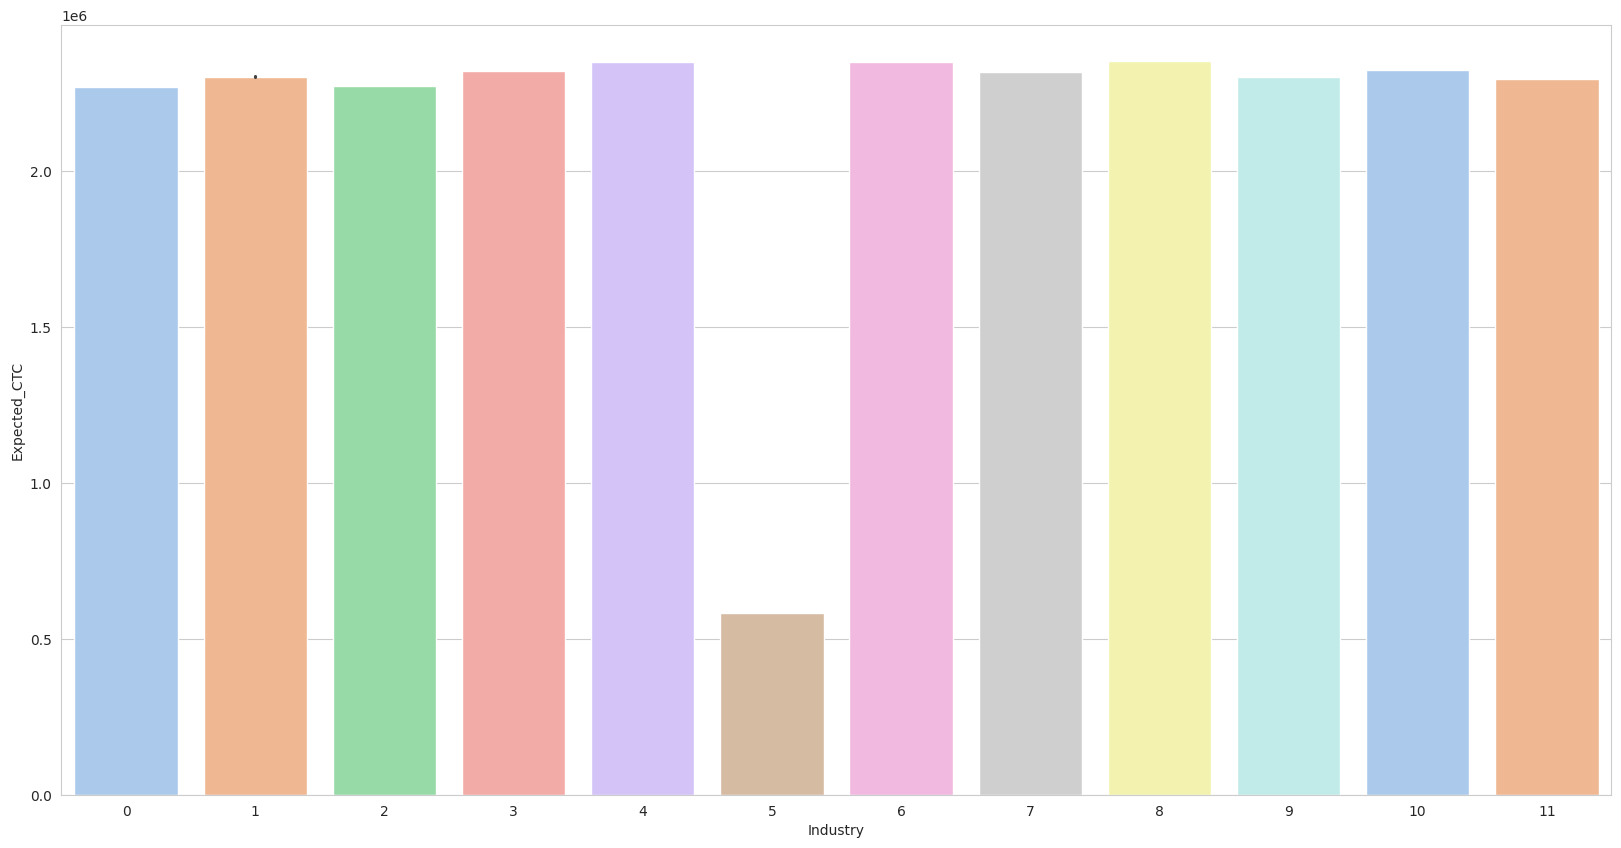

In [ ]:
plt.figure(figsize=(20,10))
ax=sns.barplot(x=data['Industry'],y=data['Expected_CTC'],ci=True,palette='pastel')
plt.show()

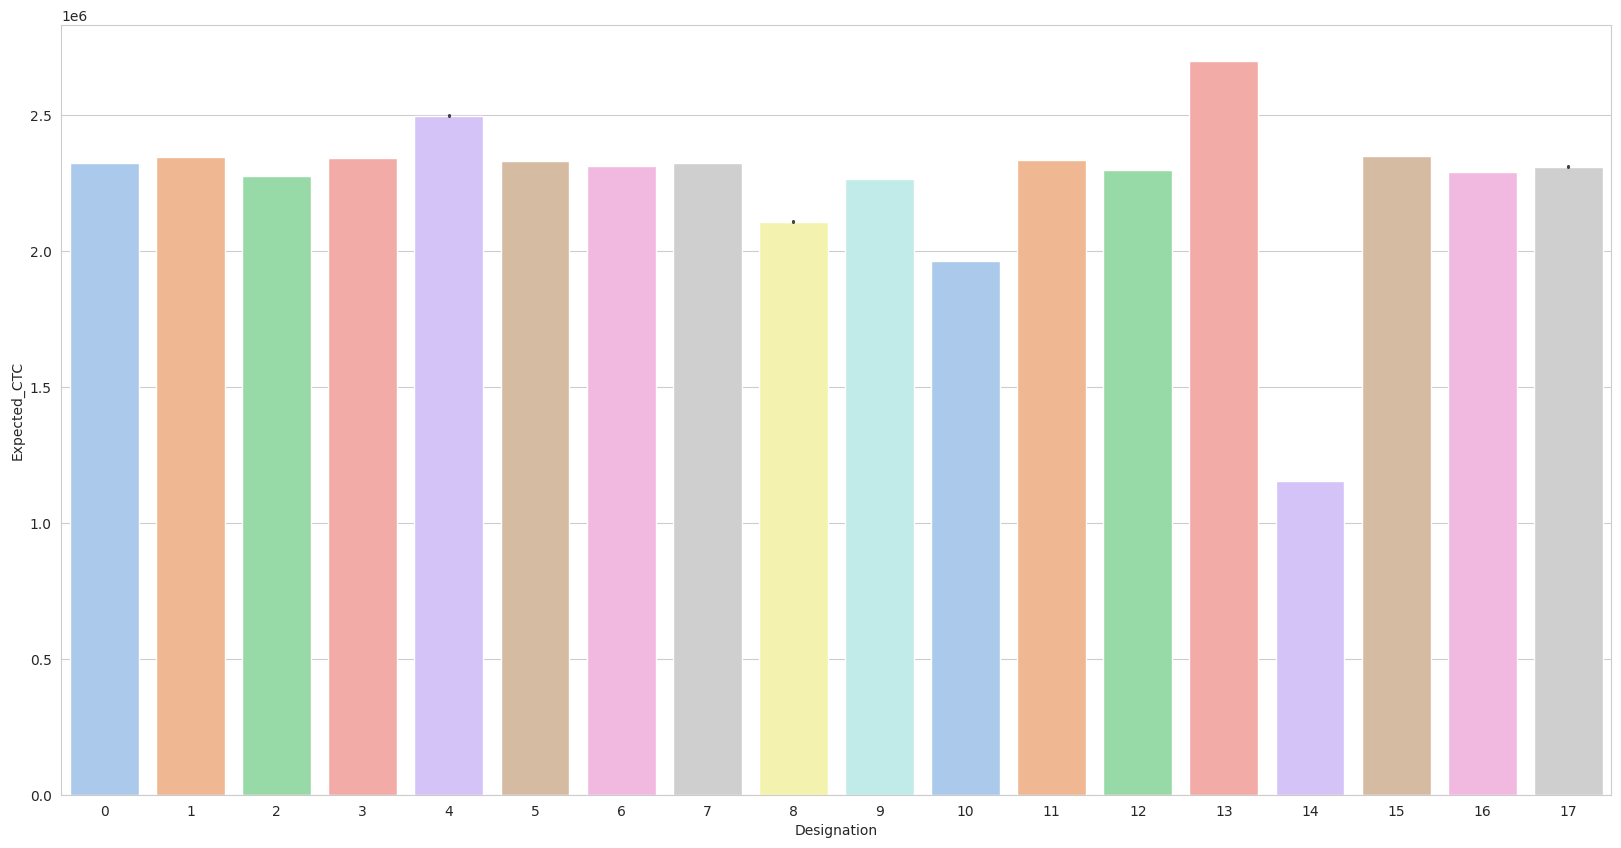

In [ ]:
plt.figure(figsize=(20,10))
ax=sns.barplot(x=data['Designation'],y=data['Expected_CTC'],ci=True,palette='pastel')
plt.show()

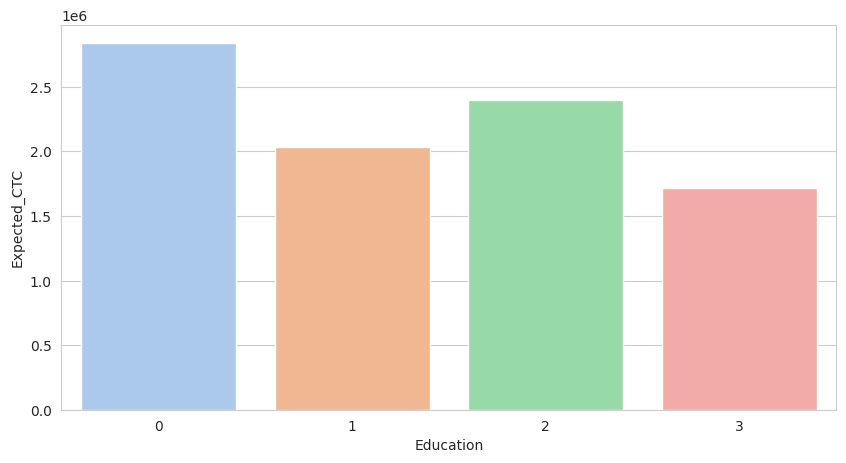

In [ ]:
plt.figure(figsize=(10,5))
ax=sns.barplot(x=data['Education'],y=data['Expected_CTC'],ci=True,palette='pastel')
plt.show()

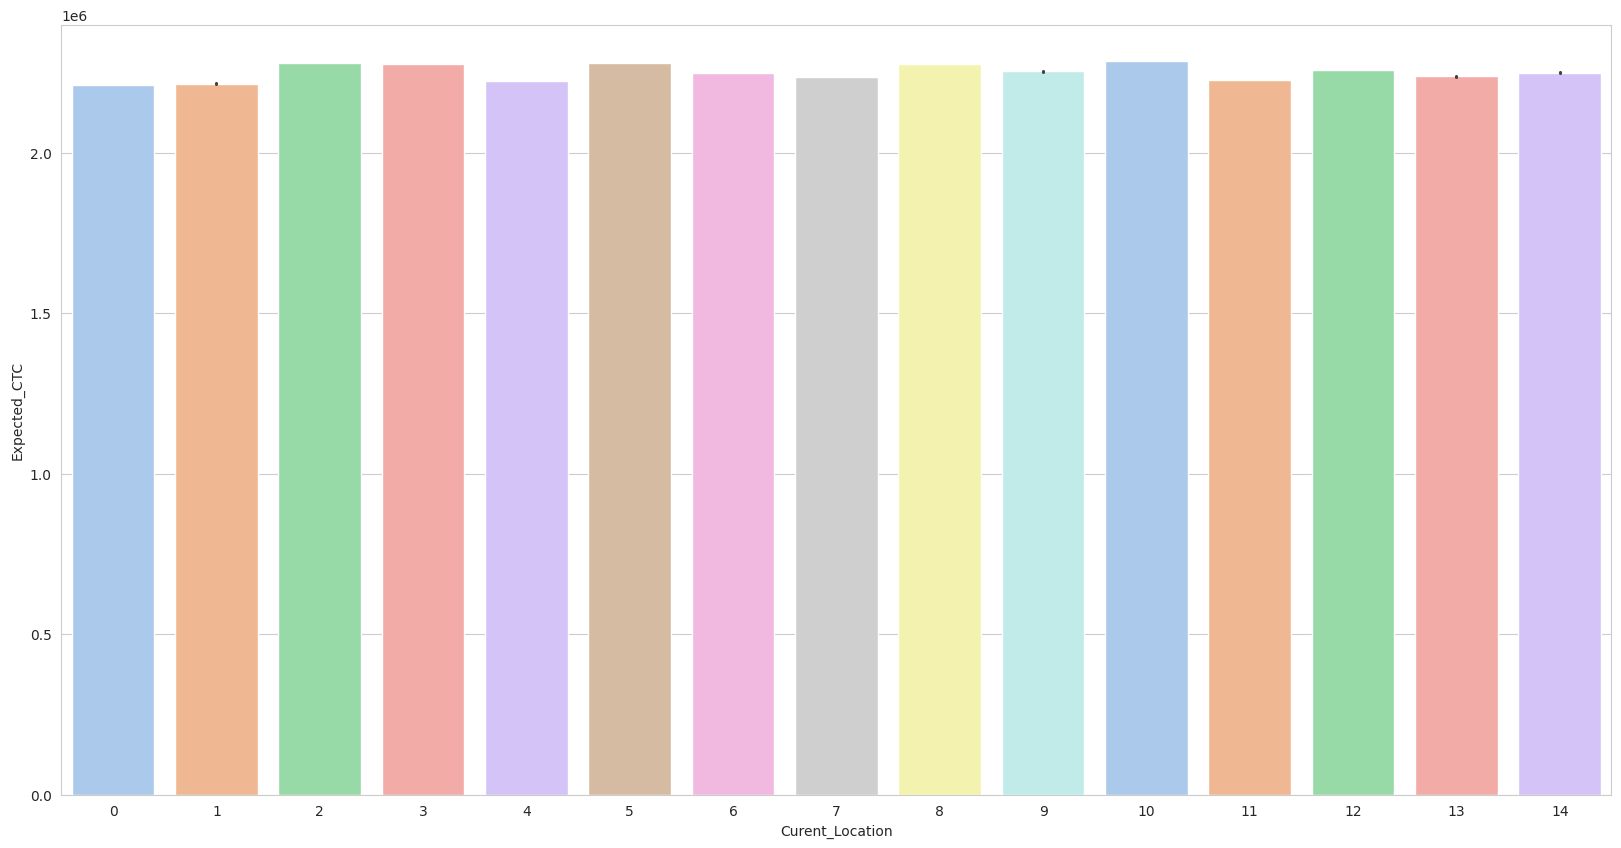

In [ ]:
plt.figure(figsize=(20,10))
ax=sns.barplot(x=data['Curent_Location'],y=data['Expected_CTC'],ci=True,palette='pastel')
plt.show()

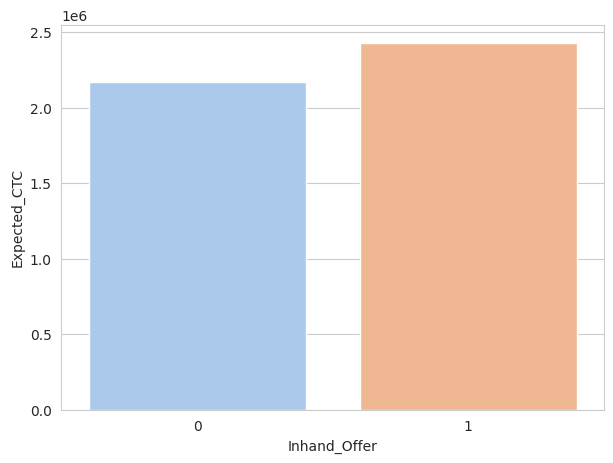

In [ ]:
plt.figure(figsize=(7,5))
ax=sns.barplot(x=data['Inhand_Offer'],y=data['Expected_CTC'],ci=True,palette='pastel')
plt.show()

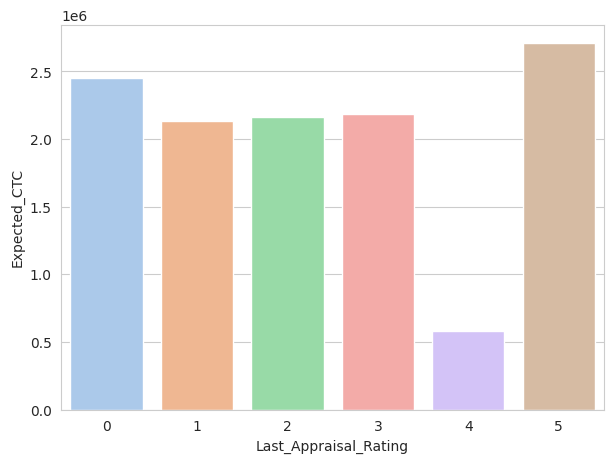

In [ ]:
plt.figure(figsize=(7,5))
ax=sns.barplot(x=data['Last_Appraisal_Rating'],y=data['Expected_CTC'],ci=True,palette='pastel')
plt.show()

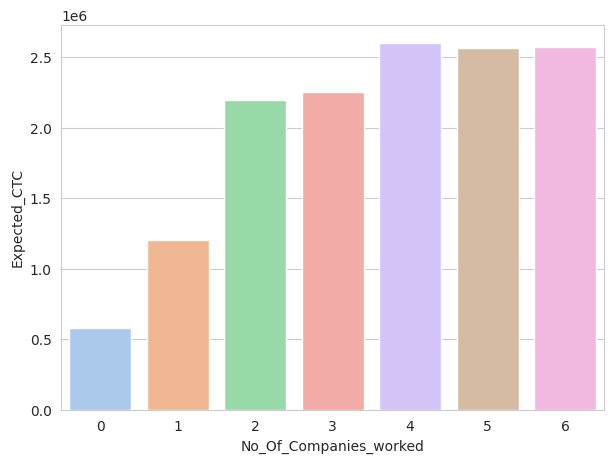

In [ ]:
plt.figure(figsize=(7,5))
ax=sns.barplot(x=data['No_Of_Companies_worked'],y=data['Expected_CTC'],ci=True,palette='pastel')
plt.show()

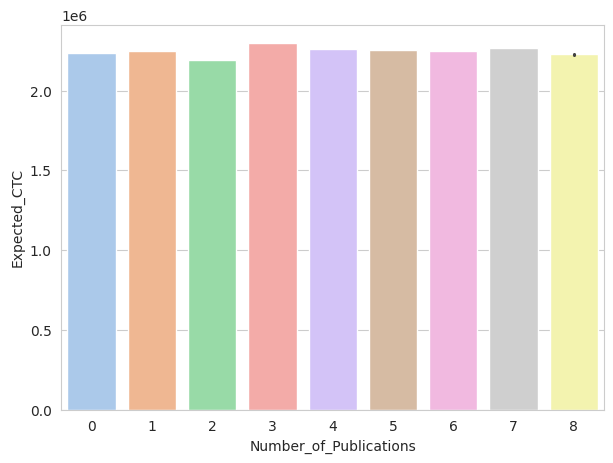

In [ ]:
plt.figure(figsize=(7,5))
ax=sns.barplot(x=data['Number_of_Publications'],y=data['Expected_CTC'],ci=True,palette='pastel')
plt.show()

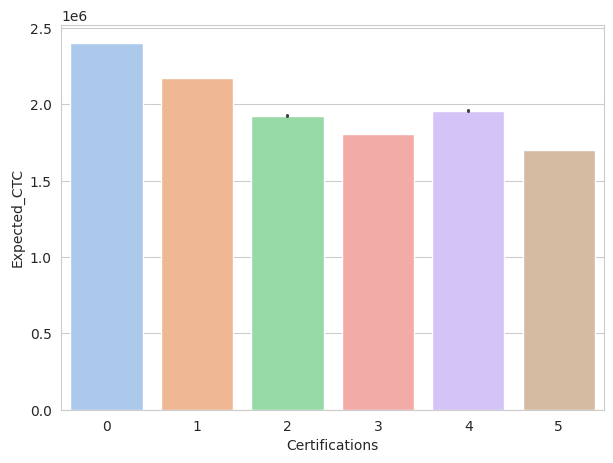

In [ ]:
plt.figure(figsize=(7,5))
ax=sns.barplot(x=data['Certifications'],y=data['Expected_CTC'],ci=True,palette='pastel')
plt.show()

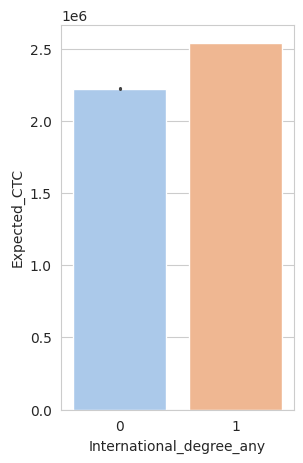

In [ ]:
plt.figure(figsize=(3,5))
ax=sns.barplot(x=data['International_degree_any'],y=data['Expected_CTC'],ci=True,palette='pastel')
plt.show()

In [ ]:
data.head()

,Total_Experience,Total_Experience_in_field_applied,Department,Role,Industry,Designation,Education,Curent_Location,Preferred_location,Current_CTC,Inhand_Offer,Last_Appraisal_Rating,No_Of_Companies_worked,Number_of_Publications,Certifications,International_degree_any,Expected_CTC
0,0,0,Others,Others,Freshers,Others,PG,Guwahati,Pune,0,0,Freshers,0,0,0,0,384551
1,23,14,HR,Consultant,Analytics,HR,Doctorate,Bangalore,Nagpur,2702664,1,Key_Performer,2,4,0,0,3783729
2,21,12,Top Management,Consultant,Training,Others,Doctorate,Ahmedabad,Jaipur,2236661,1,Key_Performer,5,3,0,0,3131325
3,15,8,Banking,Financial Analyst,Aviation,HR,Doctorate,Kanpur,Kolkata,2100510,0,C,5,3,0,0,2608833
4,10,5,Sales,Project Manager,Insurance,Medical Officer,Grad,Ahmedabad,Ahmedabad,1931644,0,C,2,3,0,0,2221390


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 17 columns):
 #   Column                             Non-Null Count  Dtype   
---  ------                             --------------  -----   
 0   Total_Experience                   25000 non-null  int64   
 1   Total_Experience_in_field_applied  25000 non-null  int64   
 2   Department                         25000 non-null  object  
 3   Role                               25000 non-null  object  
 4   Industry                           25000 non-null  object  
 5   Designation                        25000 non-null  object  
 6   Education                          25000 non-null  object  
 7   Curent_Location                    25000 non-null  object  
 8   Preferred_location                 25000 non-null  object  
 9   Current_CTC                        25000 non-null  int64   
 10  Inhand_Offer                       25000 non-null  int8    
 11  Last_Appraisal_Rating              25000 

*We have to convert "object" data type to "int".
So we can encod the*

In [ ]:
data['Department'] = pd.Categorical(data['Department'])
data['Industry'] = pd.Categorical(data['Industry'])
data['Role'] = pd.Categorical(data['Role'])
data['Designation'] = pd.Categorical(data['Designation'])
data['Education'] = pd.Categorical(data['Education'])
data['Curent_Location'] = pd.Categorical(data['Curent_Location'])
data['Preferred_location'] = pd.Categorical(data['Preferred_location'])
data['Last_Appraisal_Rating'] = pd.Categorical(data['Last_Appraisal_Rating'])

In [ ]:
data['Department'] = data['Department'].cat.codes
data['Industry'] = data['Industry'].cat.codes
data['Role'] = data['Role'].cat.codes
data['Designation'] = data['Designation'].cat.codes
data['Education'] = data['Education'].cat.codes
data['Curent_Location'] = data['Curent_Location'].cat.codes
data['Preferred_location'] =data['Preferred_location'].cat.codes
data['Last_Appraisal_Rating'] = data['Last_Appraisal_Rating'].cat.codes
data['No_Of_Companies_worked'] = data['No_Of_Companies_worked'].cat.codes
data['International_degree_any'] = data['International_degree_any'].cat.codes

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 17 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Total_Experience                   25000 non-null  int64
 1   Total_Experience_in_field_applied  25000 non-null  int64
 2   Department                         25000 non-null  int8 
 3   Role                               25000 non-null  int8 
 4   Industry                           25000 non-null  int8 
 5   Designation                        25000 non-null  int8 
 6   Education                          25000 non-null  int8 
 7   Curent_Location                    25000 non-null  int8 
 8   Preferred_location                 25000 non-null  int8 
 9   Current_CTC                        25000 non-null  int64
 10  Inhand_Offer                       25000 non-null  int8 
 11  Last_Appraisal_Rating              25000 non-null  int8 
 12  No_Of_Companies_wo

# RFE Analysis

In [ ]:
from sklearn.feature_selection import RFE

In [ ]:
X= data.drop(['Expected_CTC'], axis = 1)

In [ ]:
X.head()

,Total_Experience,Total_Experience_in_field_applied,Department,Role,Industry,Designation,Education,Curent_Location,Preferred_location,Current_CTC,Inhand_Offer,Last_Appraisal_Rating,No_Of_Companies_worked,Number_of_Publications,Certifications,International_degree_any
0,0,0,9,11,5,10,2,5,13,0,0,4,0,0,0,0
1,23,14,5,6,0,5,0,1,12,2702664,1,5,2,4,0,0
2,21,12,11,6,11,10,0,0,6,2236661,1,5,5,3,0,0
3,15,8,2,8,2,5,0,7,8,2100510,0,2,5,3,0,0
4,10,5,10,14,7,8,1,0,0,1931644,0,2,2,3,0,0


In [ ]:
y= data.Expected_CTC

In [ ]:
y.head()

0     384551
1    3783729
2    3131325
3    2608833
4    2221390
Name: Expected_CTC, dtype: int64

In [ ]:
from sklearn.ensemble import RandomForestRegressor
# Initialize a Random Forest classifier
estimator = RandomForestRegressor(n_estimators=50, random_state=1)

# Initialize RFE with the estimator and the number of features to retain
rfe = RFE(estimator, n_features_to_select=10)

# Fit RFE to the entire dataset
fit = rfe.fit(X, y)

# Selected features
selected_features = fit.support_
print("Selected Features:", selected_features)

Selected Features: [ True False False  True False False  True  True  True  True  True  True
  True  True False False]


In [ ]:
X.head()

,Total_Experience,Total_Experience_in_field_applied,Department,Role,Industry,Designation,Education,Curent_Location,Preferred_location,Current_CTC,Inhand_Offer,Last_Appraisal_Rating,No_Of_Companies_worked,Number_of_Publications,Certifications,International_degree_any
0,0,0,9,11,5,10,2,5,13,0,0,4,0,0,0,0
1,23,14,5,6,0,5,0,1,12,2702664,1,5,2,4,0,0
2,21,12,11,6,11,10,0,0,6,2236661,1,5,5,3,0,0
3,15,8,2,8,2,5,0,7,8,2100510,0,2,5,3,0,0
4,10,5,10,14,7,8,1,0,0,1931644,0,2,2,3,0,0


In [ ]:
scale_data = X.drop(['Total_Experience_in_field_applied','Department','Industry','Designation','Certifications','International_degree_any'],axis = 1)

In [ ]:
scale_data.head()

,Total_Experience,Role,Education,Curent_Location,Preferred_location,Current_CTC,Inhand_Offer,Last_Appraisal_Rating,No_Of_Companies_worked,Number_of_Publications
0,0,11,2,5,13,0,0,4,0,0
1,23,6,0,1,12,2702664,1,5,2,4
2,21,6,0,0,6,2236661,1,5,5,3
3,15,8,0,7,8,2100510,0,2,5,3
4,10,14,1,0,0,1931644,0,2,2,3


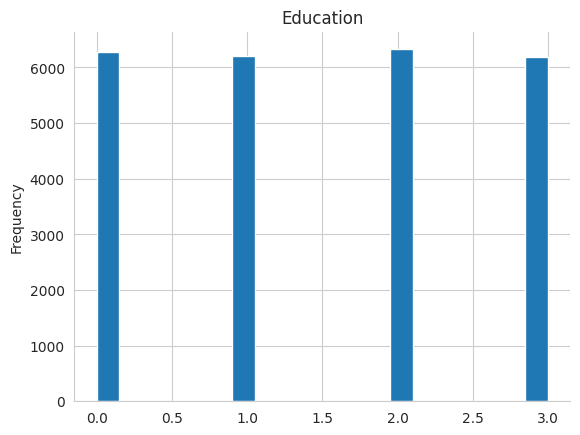

In [ ]:
#  Education

from matplotlib import pyplot as plt
scale_data['Education'].plot(kind='hist', bins=20, title='Education')
plt.gca().spines[['top', 'right',]].set_visible(False)

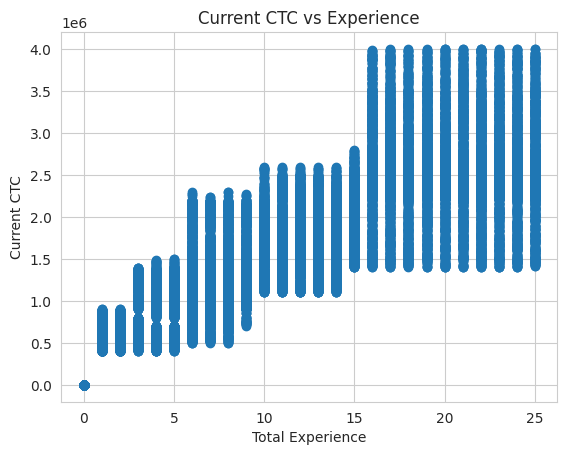

In [ ]:
# Current CTC vs Experience

import matplotlib.pyplot as plt
plt.scatter(scale_data['Total_Experience'], scale_data['Current_CTC'])
plt.xlabel('Total Experience')
plt.ylabel('Current CTC')
_ = plt.title('Current CTC vs Experience')

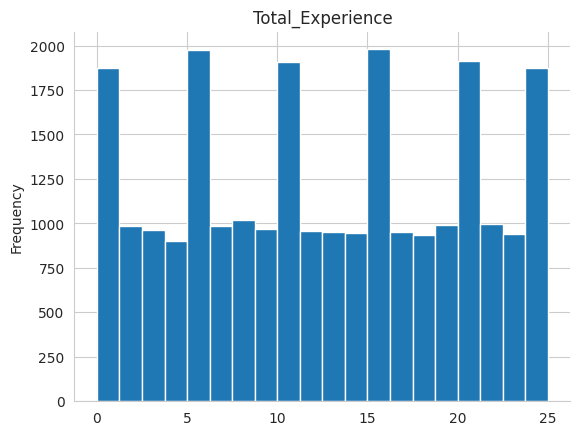

In [ ]:
#  Total_Experience

from matplotlib import pyplot as plt
scale_data['Total_Experience'].plot(kind='hist', bins=20, title='Total_Experience')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
x =StandardScaler()

In [ ]:
scaled_df = x.fit_transform(scale_data)

In [ ]:
scaled_df

array([[-1.67215429,  0.04204445,  0.45126406, ...,  1.09122503,
        -2.06001181, -1.56874998],
       [ 1.40631384, -0.66586999, -1.33960847, ...,  1.69031205,
        -0.87679059, -0.03415997],
       [ 1.13862096, -0.66586999, -1.33960847, ...,  1.69031205,
         0.89804124, -0.41780748],
       ...,
       [ 1.2724674 , -0.24112132,  1.34670033, ..., -0.10694902,
         0.30643063,  0.34948753],
       [ 1.67400672, -0.80745288,  0.45126406, ..., -0.70603604,
        -0.28517998, -1.18510248],
       [-0.60138277, -0.66586999, -0.4441722 , ..., -1.30512306,
        -0.87679059,  0.73313503]])

In [ ]:
from sklearn.cluster import KMeans
k_means = KMeans(n_clusters = 2)

In [ ]:
k_means.fit(scaled_df)

KMeans(n_clusters=2)

In [ ]:
k_means.labels_

array([1, 0, 0, ..., 0, 0, 1], dtype=int32)

In [ ]:
k_means.inertia_

211893.73692685243

In [ ]:
k_means = KMeans(n_clusters = 1,random_state=1)
k_means.fit(scaled_df)
k_means.inertia_

249999.9999999999

In [ ]:
k_means = KMeans(n_clusters = 2,random_state=1)
k_means.fit(scaled_df)
k_means.inertia_

211893.92438503072

In [ ]:
k_means = KMeans(n_clusters = 3,random_state=1)
k_means.fit(scaled_df)
k_means.inertia_

190242.21739650163

In [ ]:
k_means = KMeans(n_clusters = 4,random_state=1)
k_means.fit(scaled_df)
k_means.inertia_

180302.15930825716

In [ ]:
k_means = KMeans(n_clusters = 5,random_state=1)
k_means.fit(scaled_df)
k_means.inertia_

172413.81300687417

In [ ]:
k_means = KMeans(n_clusters = 6,random_state=1)
k_means.fit(scaled_df)
k_means.inertia_

165894.29133165703

In [ ]:
wss =[]

In [ ]:
for i in range(1,11):
    KM = KMeans(n_clusters=i, random_state=1)
    KM.fit(scaled_df)
    wss.append(KM.inertia_)

In [ ]:
wss

[249999.9999999999,
 211893.92438503072,
 190242.21739650163,
 180302.15930825716,
 172413.81300687417,
 165894.29133165703,
 160576.8311867193,
 155551.54410477262,
 151642.85369396262,
 148290.84740284178]

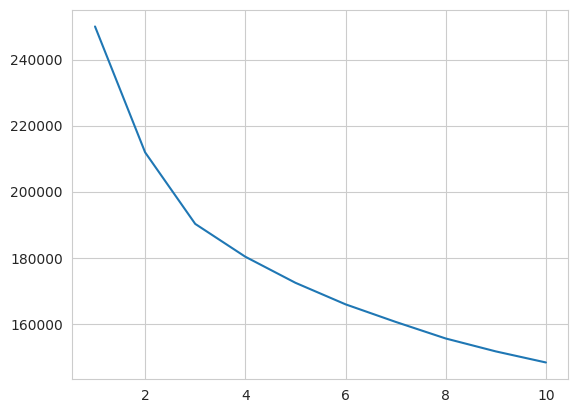

In [ ]:
plt.plot(range(1,11), wss)

In [ ]:
k_means = KMeans(n_clusters = 3)
k_means.fit(scaled_df)
labels = k_means.labels_

In [ ]:
scale_data["Clus_kmeans"] = labels
scale_data.head(5)

,Total_Experience,Role,Education,Curent_Location,Preferred_location,Current_CTC,Inhand_Offer,Last_Appraisal_Rating,No_Of_Companies_worked,Number_of_Publications,Clus_kmeans
0,0,11,2,5,13,0,0,4,0,0,2
1,23,6,0,1,12,2702664,1,5,2,4,0
2,21,6,0,0,6,2236661,1,5,5,3,0
3,15,8,0,7,8,2100510,0,2,5,3,1
4,10,14,1,0,0,1931644,0,2,2,3,1


In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [ ]:
silhouette_score(scaled_df,labels)

0.1426578239543327

In [ ]:
k_means = KMeans(n_clusters = 2)
k_means.fit(scaled_df)
labels2 = k_means.labels_

In [ ]:
silhouette_score(scaled_df,labels2)

0.14267066331879125

# Model Building

# Train Test Split

In [ ]:
scale_data.head()

,Total_Experience,Role,Education,Curent_Location,Preferred_location,Current_CTC,Inhand_Offer,Last_Appraisal_Rating,No_Of_Companies_worked,Number_of_Publications,Clus_kmeans
0,0,11,2,5,13,0,0,4,0,0,2
1,23,6,0,1,12,2702664,1,5,2,4,0
2,21,6,0,0,6,2236661,1,5,5,3,0
3,15,8,0,7,8,2100510,0,2,5,3,1
4,10,14,1,0,0,1931644,0,2,2,3,1


In [ ]:
x= scale_data.drop(['Clus_kmeans'], axis=1)

In [ ]:
y= data.Expected_CTC

In [ ]:
# Split X and y into training and test set in 70:30 ratio
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30 , random_state=1)

# Parametric Models

# Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [ ]:
x_train=sm.add_constant(x_train)# This adds the constant term beta0 to the Simple Linear Regression.
x_test=sm.add_constant(x_test)

In [ ]:
Linear_OLS_model = sm.OLS(y_train,x_train).fit()
print(Linear_OLS_model.summary())

                            OLS Regression Results                            
Dep. Variable:           Expected_CTC   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                 7.951e+04
Date:                Sat, 24 Feb 2024   Prob (F-statistic):               0.00
Time:                        06:45:17   Log-Likelihood:            -2.3555e+05
No. Observations:               17500   AIC:                         4.711e+05
Df Residuals:                   17489   BIC:                         4.712e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   1.79

# Now as observed from above the predictor 'Number_of_Publications' ,'Curent_Location','Preferred_location','Role'has p-value>0.05 we remove those and build the model

In [ ]:
x_train1 = x_train.drop(["Number_of_Publications","Curent_Location","Preferred_location","Role"],axis=1)

In [ ]:
Linear_OLS_model2 = sm.OLS(y_train, x_train1)
Linear_OLS_model2 = Linear_OLS_model2.fit()
print(Linear_OLS_model2.summary())

                            OLS Regression Results                            
Dep. Variable:           Expected_CTC   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                 1.325e+05
Date:                Sat, 24 Feb 2024   Prob (F-statistic):               0.00
Time:                        06:45:17   Log-Likelihood:            -2.3555e+05
No. Observations:               17500   AIC:                         4.711e+05
Df Residuals:                   17493   BIC:                         4.712e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   1.79

In [ ]:
# let's check the VIF of the predictors
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_series1 = pd.Series(
    [variance_inflation_factor(x_train1.values, i) for i in range(x_train1.shape[1])],
    index=x_train1.columns,
)
print("VIF values: \n\n{}\n".format(vif_series1))

VIF values: 

const                     12.177076
Total_Experience           4.172898
Education                  1.231157
Current_CTC                4.399646
Inhand_Offer               1.107158
Last_Appraisal_Rating      1.104538
No_Of_Companies_worked     1.201446
dtype: float64



# VIF value > 2 for "total experience" and "current CTC" so droping this features and re running the linear model




In [ ]:
x_train2 = x_train1.drop(["Total_Experience"],axis=1)
Linear_OLS_model3 = sm.OLS(y_train, x_train2)
Linear_OLS_model3 = Linear_OLS_model3.fit()
print(Linear_OLS_model3.summary())

                            OLS Regression Results                            
Dep. Variable:           Expected_CTC   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                 1.580e+05
Date:                Sat, 24 Feb 2024   Prob (F-statistic):               0.00
Time:                        06:45:17   Log-Likelihood:            -2.3561e+05
No. Observations:               17500   AIC:                         4.712e+05
Df Residuals:                   17494   BIC:                         4.713e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   1.90

In [ ]:
x_train3 = x_train2.drop(["Current_CTC"],axis=1)
Linear_OLS_model4 = sm.OLS(y_train, x_train3)
Linear_OLS_model4 = Linear_OLS_model4.fit()
print(Linear_OLS_model4.summary())

                            OLS Regression Results                            
Dep. Variable:           Expected_CTC   R-squared:                       0.202
Model:                            OLS   Adj. R-squared:                  0.202
Method:                 Least Squares   F-statistic:                     1110.
Date:                Sat, 24 Feb 2024   Prob (F-statistic):               0.00
Time:                        06:45:17   Log-Likelihood:            -2.6716e+05
No. Observations:               17500   AIC:                         5.343e+05
Df Residuals:                   17495   BIC:                         5.344e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   1.82

## However "Current CTC" variable has 4.399646 as VIF if we drop the feature and rerun the model R-suared value is decreasing drastically. Hence its not recommended to drop this feature.

In [ ]:
x_test1 =  x_test.drop(["Number_of_Publications","Curent_Location","Preferred_location","Role","Total_Experience"],axis=1)

In [ ]:
Linear_OLS_model_test = sm.OLS(y_test, x_test1)
Linear_OLS_model_test= Linear_OLS_model_test.fit()
print(Linear_OLS_model_test.summary())

                            OLS Regression Results                            
Dep. Variable:           Expected_CTC   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                 7.105e+04
Date:                Sat, 24 Feb 2024   Prob (F-statistic):               0.00
Time:                        06:45:17   Log-Likelihood:            -1.0089e+05
No. Observations:                7500   AIC:                         2.018e+05
Df Residuals:                    7494   BIC:                         2.018e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   1.73

# From OLS stats model we can fair R-Squared and Adjusted R-Squared value. However a few variables have VIF values > 2 therefore some multicolinearity in the data. Hence those features are important for the analysis we cannot drop those variables.

For Linear Regression, we need to check if the following assumptions hold:-

Linearity

Independence

Homoscedasticity

Normality of error terms

No strong Multicollinearity


# Linearity and Independence of predictors

In [ ]:
df_pred= pd.DataFrame()

df_pred["Actual Values"] = y_train.values.flatten()  # actual values
df_pred["Fitted Values"] = Linear_OLS_model3.fittedvalues.values  # predicted values
df_pred["Residuals"] = Linear_OLS_model3.resid.values  # residuals

df_pred.head()

,Actual Values,Fitted Values,Residuals
0,3109048,3.270730e+06,-161682.336811
1,2067059,2.039731e+06,27327.765505
2,4915655,4.598301e+06,317354.211773
3,1959755,1.908021e+06,51734.140604
4,4514894,4.226240e+06,288653.934489


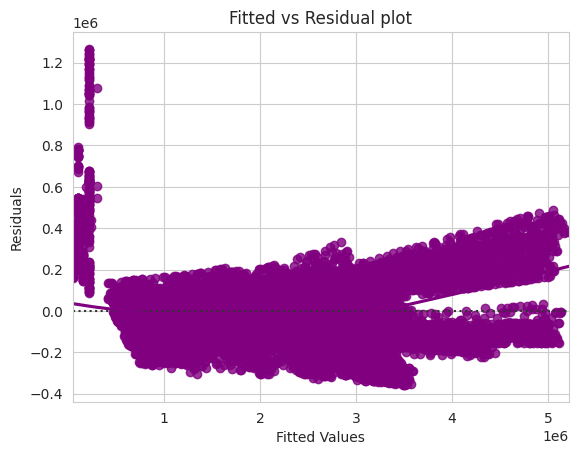

In [ ]:
# let us plot the fitted values vs residuals
sns.set_style("whitegrid")
sns.residplot(
    data=df_pred, x="Fitted Values", y="Residuals", color="purple", lowess=True
)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

# Test for Normality

In [ ]:
from scipy.stats import shapiro

In [ ]:
shapiro(df_pred["Residuals"])

ShapiroResult(statistic=0.9274551868438721, pvalue=0.0)

# Since p-value < 0.05, the residuals are not normal as per shapiro test.

# Test Homoscedasticity

In [ ]:
import statsmodels.stats.api as sms
sms.het_goldfeldquandt(df_pred["Residuals"], x_train2)[1]

0.9681490146760195

# Since p-value > 0.05 we can say that the residuals are homoscedastic.

# The model built Linear_OLS_model2 satisfies all assumptions of Linear Regression

In [ ]:
Linear_OLS_model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Expected_CTC   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                 1.580e+05
Date:                Sat, 24 Feb 2024   Prob (F-statistic):               0.00
Time:                        06:45:31   Log-Likelihood:            -2.3561e+05
No. Observations:               17500   AIC:                         4.712e+05
Df Residuals:                   17494   BIC:                         4.713e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   1.905e+05   4374.222     43.558      0.000    1.82e+05    1.99e+05
Education              -5.495e+04   1190.996    -46.142      0.000   -5.73e+04   -5.26e+04
Current_CTC                1.2405      0.002    791.487      0.000       1.237       1.244
Inhand_Offer              8.3e+04   2945.843     28.174      0.000    7.72e+04    8.88e+04
Last_Appraisal_Rating   5280.8447    810.810      6.513      0.000    3691.576    6870.113
No_Of_Companies_worked  -2.26e+04    827.760    -27.303      0.000   -2.42e+04    -2.1e+04
==============================================================================
Omnibus:                     5482.504   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            29886.501
Skew:                           1.405   Prob(JB):                         0.00
Kurtosis:                       8.753   Cond. No.                     6.84e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.84e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
#The model equation will be as follows:

In [ ]:
# Let us write the equation of linear regression
Equation = "log_price ="
print(Equation, end=" ")
for i in range(len(x_train2.columns)):
    if i == 0:
        print(Linear_OLS_model3.params[i], "+", end=" ")
    elif i != len(x_train2.columns) - 1:
        print(
            Linear_OLS_model3.params[i],
            "* (",
            x_train2.columns[i],
            ")",
            "+",
            end="  ",
        )
    else:
        print(Linear_OLS_model3.params[i], "* (", x_train2.columns[i], ")")

log_price = 190534.04994845903 + -54954.71503059261 * ( Education ) +  1.2405062616835487 * ( Current_CTC ) +  82995.6559205985 * ( Inhand_Offer ) +  5280.844726507615 * ( Last_Appraisal_Rating ) +  -22600.189759801273 * ( No_Of_Companies_worked )


In [ ]:
# let's make predictions on the test set
y_pred_test = Linear_OLS_model_test.predict(x_test1)
y_pred_train =Linear_OLS_model3.predict(x_train2)

In [ ]:
# let's check the RMSE on the train data
rmse_linear_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
rmse_linear_train

In [ ]:
# let's check the RMSE on the test data
rmse_linear_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
rmse_linear_test

NameError: name 'mean_squared_error' is not defined

In [ ]:
# To check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [ ]:
regression_model = LinearRegression()
regression_model.fit(x_train2, y_train)

In [ ]:
for idx, col_name in enumerate(x_train2.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_))

In [ ]:
for idx, col_name in enumerate(x_test1.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_))

In [ ]:
intercept = regression_model.intercept_

print("The intercept for our model is {}".format(intercept))

In [ ]:
regression_model_test = LinearRegression()
regression_model_test.fit(x_test1, y_test)

In [ ]:
# let's make predictions on the test set
y_pred_test_SK = regression_model_test.predict(x_test1)
y_pred_train_SK =regression_model.predict(x_train2)

In [ ]:
# let's check the RMSE on the train data
rmse_linear_train2 = np.sqrt(mean_squared_error(y_train, y_pred_train_SK))
rmse_linear_train2

In [ ]:
# let's check the RMSE on the test data
rmse_linear_test2 = np.sqrt(mean_squared_error(y_test, y_pred_test_SK))
rmse_linear_test2

In [ ]:
from sklearn.metrics import r2_score
# Calculate the R-squared value train Linear SK
r_squared_linear_SK = r2_score(y_train, y_pred_train_SK)
print("R-squared value:", r_squared_linear_SK)

In [ ]:
# Calculate the R-squared value test Linear SK
r_squared_linear_SK = r2_score(y_test, y_pred_test_SK)
print("R-squared value:", r_squared_linear_SK)

In [ ]:
# Display the coefficients of the Regression model
print("Regreesion Coefficients:", regression_model.coef_)

In [ ]:
# Display the coefficients of the Regression model
print("Regression Coefficients:", regression_model_test.coef_)

In [ ]:
# Display the coefficients of the Regression model
print("Regression Coefficients:", regression_model_test.coef_)

# Building Ridge Model

In [ ]:
# Standardize the features using StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train2)
x_test_scaled = scaler.transform(x_test1)

In [ ]:
# Initialize Ridge regression model for train
alpha = 1.0  # Regularization strength (adjust as needed)
ridge_model = Ridge(alpha=alpha)

In [ ]:
# Fit the Ridge model to the training data
ridge_model.fit(x_train_scaled, y_train)

In [ ]:
  # Initialize Ridge regression model for test
alpha = 1.0  # Regularization strength (adjust as needed)
ridge_model_test= Ridge(alpha=alpha)

In [ ]:
# Fit the Ridge model to the test data
ridge_model_test.fit(x_train_scaled, y_train)

In [ ]:
# let's make predictions on the test set
y_pred_test_ridge = ridge_model_test.predict(x_test1)
y_pred_train_ridge = ridge_model.predict(x_train2)

In [ ]:
# let's check the RMSE on the train data
rmse_ridge1 = np.sqrt(mean_squared_error(y_train, y_pred_train_ridge))
rmse_ridge1

In [ ]:
# let's check the RMSE on the test data
rmse_ridge2 = np.sqrt(mean_squared_error(y_test, y_pred_test_ridge))
rmse_ridge2

In [ ]:
# Calculate the R-squared value train Ridge
r_squared_Ridge = r2_score(y_train, y_pred_train_ridge)
print("R-squared value:", r_squared_Ridge)

In [ ]:
# Calculate the R-squared value train Ridge
r_squared_Ridge = r2_score(y_test, y_pred_test_ridge)
print("R-squared value:", r_squared_Ridge)

In [ ]:
# Calculate residuals
residuals = y_test - y_pred_test_ridge

# Create a residual plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred_test_ridge, y=residuals, color='purple', alpha=1.0)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.title('Residual Plot for Ridge Regression')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

In [ ]:
# Display the coefficients of the Ridge model
print("Ridge Coefficients:", ridge_model.coef_)

In [ ]:
# Display the coefficients of the Ridge model
print("Ridge Coefficients:", ridge_model_test.coef_)

In [ ]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred_test_ridge)
print(f'Mean Squared Error on Test Set: {mse}')

# Building LASSO model

In [ ]:
# Initialize Lasso regression model
alpha = 1.0  # Regularization strength (adjust as needed)
lasso_model = Lasso(alpha=alpha)

In [ ]:
# Fit the Lasso model to the training data
lasso_model.fit(x_train_scaled, y_train)

In [ ]:
# Initialize Lasso regression model
alpha = 1.0  # Regularization strength (adjust as needed)
lasso_model_test = Lasso(alpha=alpha)

In [ ]:
# Fit the Lasso model to the test data
lasso_model_test.fit(x_test_scaled, y_test)

In [ ]:
# let's make predictions on the test set
y_pred_test_lasso = lasso_model_test.predict(x_test1)
y_pred_train_lasso = lasso_model.predict(x_train2)

In [ ]:
# let's check the RMSE on the train data
rmse_lasso1 = np.sqrt(mean_squared_error(y_train, y_pred_train_lasso))
rmse_lasso1

In [ ]:
# let's check the RMSE on the test data
rmse_lasso2 = np.sqrt(mean_squared_error(y_test, y_pred_test_lasso))
rmse_lasso2

In [ ]:
# Calculate the R-squared value train Lasso
r_squared_Lasso = r2_score(y_train, y_pred_train_lasso)
print("R-squared value:", r_squared_Lasso)

In [ ]:
# Calculate the R-squared value test Lasso
r_squared_Lasso = r2_score(y_test, y_pred_test_lasso)
print("R-squared value:", r_squared_Lasso)

In [ ]:
# Calculate residuals
residuals = y_test - y_pred_test_lasso

# Create a residual plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred_test_lasso, y=residuals, color='purple', alpha=1.0)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.title('Residual Plot for Lasso Regression')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

In [ ]:
# Display the coefficients of the Lasso model
print("Lasso Coefficients:", lasso_model.coef_)

In [ ]:
# Display the coefficients of the Lasso model
print("Lasso Coefficients:", lasso_model_test.coef_)

In [ ]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred_test_lasso)
print(f'Mean Squared Error on Test Set: {mse}')

# OLS Model

In [ ]:
import statsmodels.formula.api as smf

In [ ]:
x.shape

In [ ]:
y.shape

In [ ]:
x_train2.shape

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [ ]:
# Fit the Ordinal Least Squares Regression model
OLS_model = smf.ols(formula='y_train ~ x_train2',data= x_train2).fit()

In [ ]:
OLS_model.summary()

In [ ]:
OLS_model2 = smf.ols(formula='y_test ~ x_test1',data= x_test).fit()

In [ ]:
OLS_model2.summary()

In [ ]:
# let's make predictions on the test set
y_pred_test_OLStest= OLS_model2.predict(x_test1)
y_pred_train_OLStrain = OLS_model.predict(x_train2)

In [ ]:
# let's check the RMSE on the train data
rmse_OLS1 = np.sqrt(mean_squared_error(y_train, y_pred_train_OLStrain))
rmse_OLS1

In [ ]:
# let's check the RMSE on the test data
rmse_OLS2 = np.sqrt(mean_squared_error(y_test, y_pred_test_OLStest))
rmse_OLS2

In [ ]:
# Calculate the R-squared value train OLS
r_squared_OLS = r2_score(y_train, y_pred_train_OLStrain)
print("R-squared value:", r_squared_OLS)

In [ ]:
# Calculate the R-squared value test Lasso
r_squared_OLS = r2_score(y_test, y_pred_test_OLStest)
print("R-squared value:", r_squared_OLS)

In [ ]:
# Calculate residuals
residuals = y_test - y_pred_test_OLStest

# Create a residual plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred_test_OLStest, y=residuals, color='purple', alpha=1.0)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.title('Residual Plot for OLS Regression')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

In [ ]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred_test_OLStest)
print(f'Mean Squared Error on Test Set: {mse}')

# Non Parametric Models

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

# K Nearest Neighbors Regression Model

In [ ]:
# Initialize KNN regression model
k_neighbors = 5  # You can adjust the number of neighbors
knn_model = KNeighborsRegressor(n_neighbors=k_neighbors)

In [ ]:
# Fit the KNN model to the training data
knn_model.fit(x_train, y_train)

In [ ]:
# Initialize KNN regression model
k_neighbors = 5  # You can adjust the number of neighbors
knn_model_test = KNeighborsRegressor(n_neighbors=k_neighbors)

In [ ]:
# Fit the KNN model to the test data
knn_model_test.fit(x_test, y_test)

In [ ]:
# let's make predictions on the test set
y_pred_test_KNN= knn_model_test.predict(x_test)
y_pred_train_KNN = knn_model.predict(x_train)

In [ ]:
# let's check the RMSE on the train data
rmse_KNN = np.sqrt(mean_squared_error(y_train, y_pred_train_KNN))
rmse_KNN

In [ ]:
# let's check the RMSE on the test data
rmse_KNN = np.sqrt(mean_squared_error(y_test, y_pred_test_KNN))
rmse_KNN

In [ ]:
# Calculate the R-squared value train KNN
r_squared_KNN = r2_score(y_train, y_pred_train_KNN)
print("R-squared value:", r_squared_KNN)

In [ ]:
# Calculate the R-squared value test KNN
r_squared_KNN = r2_score(y_test, y_pred_test_KNN)
print("R-squared value:", r_squared_KNN)

In [ ]:
# Calculate residuals
residuals = y_test - y_pred_test_KNN

# Create a residual plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred_test_KNN, y=residuals, color='purple', alpha=1.0)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.title('Residual Plot for KNN Regression')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

In [ ]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred_test_KNN)
print(f'Mean Squared Error on Test Set: {mse}')

# Random Forest Model

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
# Initialize Random Forest regression model
n_estimators = 100  # Number of trees in the forest
random_forest_model = RandomForestRegressor(n_estimators=n_estimators, random_state=42)

In [ ]:
# Fit the Random Forest model to the training data
random_forest_model.fit(x_train, y_train)

In [ ]:
# Make predictions on the test set
y_pred_random = random_forest_model.predict(x_test)

In [ ]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred_random)
print(f'Mean Squared Error on Test Set: {mse}')

In [ ]:
# let's make predictions on the test set
y_pred_test_random= random_forest_model.predict(x_test)
y_pred_train_random = random_forest_model.predict(x_train)

In [ ]:
# let's check the RMSE on the train data
rmse_KNN = np.sqrt(mean_squared_error(y_train, y_pred_train_random))
rmse_KNN

In [ ]:
# let's check the RMSE on the test data
rmse_KNN = np.sqrt(mean_squared_error(y_test, y_pred_test_random))
rmse_KNN

In [ ]:
# Calculate the R-squared value train Random
r_squared_Random = r2_score(y_train, y_pred_train_random)
print("R-squared value:", r_squared_Random)

In [ ]:
# Calculate the R-squared value test Random
r_squared_Random = r2_score(y_test, y_pred_test_random)
print("R-squared value:", r_squared_Random)

In [ ]:
# Calculate residuals
residuals = y_test - y_pred_test_random

# Create a residual plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred_test_random, y=residuals, color='purple', alpha=1.0)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.title('Residual Plot for Random Regression')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

In [ ]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred_test_random)
print(f'Mean Squared Error on Test Set: {mse}')

# Ada Boosting Model

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

In [ ]:
# Initialize AdaBoost regression model with decision trees as base learners
n_estimators = 50  # Number of weak learners (trees)
base_estimator = DecisionTreeRegressor(max_depth=1)  # Shallow decision trees
adaboost_model = AdaBoostRegressor(base_estimator=base_estimator, n_estimators=n_estimators, random_state=42)

In [ ]:
# Fit the AdaBoost model to the training data
adaboost_model.fit(x_train, y_train)

In [ ]:
# Make predictions on the test set
y_pred_ada = adaboost_model.predict(x_test)

In [ ]:
# let's make predictions on the test set
y_pred_test_adaboost= adaboost_model.predict(x_test)
y_pred_train_adaboost = adaboost_model.predict(x_train)

In [ ]:
# let's check the RMSE on the train data
rmse_KNN = np.sqrt(mean_squared_error(y_train, y_pred_train_adaboost))
rmse_KNN

In [ ]:
# let's check the RMSE on the test data
rmse_KNN = np.sqrt(mean_squared_error(y_test, y_pred_test_adaboost))
rmse_KNN

In [ ]:
# Calculate the R-squared value train adaboost
r_squared_adaboost = r2_score(y_train, y_pred_train_adaboost)
print("R-squared value:", r_squared_adaboost)

In [ ]:
# Calculate the R-squared value test adaboost
r_squared_adaboost = r2_score(y_test, y_pred_test_adaboost)
print("R-squared value:", r_squared_adaboost)

In [ ]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred_ada)
print(f'Mean Squared Error on Test Set: {mse}')

In [ ]:
# Calculate residuals
residuals = y_test - y_pred_test_adaboost

# Create a residual plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred_test_random, y=residuals, color='purple', alpha=1.0)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.title('Residual Plot for Ada boosting')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

# Bagging Model

In [ ]:
from sklearn.ensemble import BaggingRegressor

In [ ]:
# Initialize Bagging regression model with decision trees as base learners
n_estimators = 50  # Number of base learners (trees)
base_estimator = DecisionTreeRegressor()  # Base model (Decision Tree)
bagging_model = BaggingRegressor(base_estimator=base_estimator, n_estimators=n_estimators, random_state=42)

In [ ]:
# Fit the Bagging model to the training data
bagging_model.fit(x_train, y_train)

In [ ]:
# Make predictions on the test set
y_pred_bagging = bagging_model.predict(x_test)

In [ ]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred_bagging)
print(f'Mean Squared Error on Test Set: {mse}')

In [ ]:
# let's make predictions on the test set
y_pred_test_bagging= adaboost_model.predict(x_test)
y_pred_train_bagging = adaboost_model.predict(x_train)

In [ ]:
# let's check the RMSE on the train data
rmse_KNN = np.sqrt(mean_squared_error(y_train, y_pred_train_bagging))
rmse_KNN

In [ ]:
# let's check the RMSE on the test data
rmse_KNN = np.sqrt(mean_squared_error(y_test, y_pred_test_bagging))
rmse_KNN

In [ ]:
# Calculate the R-squared value train Bagging
r_squared_Bagging = r2_score(y_train, y_pred_train_adaboost)
print("R-squared value:", r_squared_Bagging)

In [ ]:
# Calculate the R-squared value test Bagging
r_squared_Bagging = r2_score(y_test, y_pred_test_bagging)
print("R-squared value:", r_squared_Bagging)

In [ ]:
# Calculate residuals
residuals = y_test - y_pred_test_bagging

# Create a residual plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred_test_bagging, y=residuals, color='purple', alpha=1.0)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.title('Residual Plot for bagging Regression')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

# Cross Validation Techniques.

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
# Initialize the Linear Regression model
linear_model = LinearRegression()
# Perform cross-validation
num_folds = 5  # Number of folds for cross-validation
cv_scores = cross_val_score(linear_model, x, y, cv=num_folds, scoring='r2')

# Print cross-validation scores
print("Cross-validation R-squared scores:", cv_scores)

# Calculate the mean and standard deviation of the cross-validation scores
mean_cv_score = cv_scores.mean()
std_cv_score = cv_scores.std()
print("Mean cross-validation R-squared score:", mean_cv_score)
print("Standard deviation of cross-validation R-squared scores:", std_cv_score)

In [ ]:
# Assuming X contains the predictor variables and y contains the target variable

# Initialize the Ridge regression model
alpha = 1.0  # Regularization strength (hyperparameter)
ridge_model = Ridge(alpha=alpha)

# Perform cross-validation
num_folds = 5  # Number of folds for cross-validation
cv_scores = cross_val_score(ridge_model, x, y, cv=num_folds, scoring='r2')

# Print cross-validation scores
print("Cross-validation R-squared scores:", cv_scores)

# Calculate the mean and standard deviation of the cross-validation scores
mean_cv_score = cv_scores.mean()
std_cv_score = cv_scores.std()
print("Mean cross-validation R-squared score:", mean_cv_score)
print("Standard deviation of cross-validation R-squared scores:", std_cv_score)

In [ ]:
# Assuming X contains the predictor variables and y contains the target variable

# Initialize the Lasso regression model
alpha = 1.0  # Regularization strength (hyperparameter)
lasso_model = Lasso(alpha=alpha)

# Perform cross-validation
num_folds = 5  # Number of folds for cross-validation
cv_scores = cross_val_score(lasso_model, x, y, cv=num_folds, scoring='r2')

# Print cross-validation scores
print("Cross-validation R-squared scores:", cv_scores)

# Calculate the mean and standard deviation of the cross-validation scores
mean_cv_score = cv_scores.mean()
std_cv_score = cv_scores.std()
print("Mean cross-validation R-squared score:", mean_cv_score)
print("Standard deviation of cross-validation R-squared scores:", std_cv_score)

In [ ]:
# Assuming X contains the predictor variables and y contains the target variable

# Initialize the OLS regression model
ols_model = LinearRegression()

# Perform cross-validation
num_folds = 5  # Number of folds for cross-validation
cv_scores = cross_val_score(ols_model, x, y, cv=num_folds, scoring='r2')

# Print cross-validation scores
print("Cross-validation R-squared scores:", cv_scores)

# Calculate the mean and standard deviation of the cross-validation scores
mean_cv_score = cv_scores.mean()
std_cv_score = cv_scores.std()
print("Mean cross-validation R-squared score:", mean_cv_score)
print("Standard deviation of cross-validation R-squared scores:", std_cv_score)

In [ ]:
# Assuming X contains the predictor variables and y contains the target variable

# Initialize the KNN regression model
k = 5  # Number of neighbors (hyperparameter)
knn_model = KNeighborsRegressor(n_neighbors=k)

# Perform cross-validation
num_folds = 5  # Number of folds for cross-validation
cv_scores = cross_val_score(knn_model, x, y, cv=num_folds, scoring='r2')

# Print cross-validation scores
print("Cross-validation R-squared scores:", cv_scores)

# Calculate the mean and standard deviation of the cross-validation scores
mean_cv_score = cv_scores.mean()
std_cv_score = cv_scores.std()
print("Mean cross-validation R-squared score:", mean_cv_score)
print("Standard deviation of cross-validation R-squared scores:", std_cv_score)

In [ ]:
# Assuming X contains the predictor variables and y contains the target variable

# Initialize the KNN regression model
k = 5  # Number of neighbors (hyperparameter)
knn_model = KNeighborsRegressor(n_neighbors=k)

# Perform cross-validation
num_folds = 5  # Number of folds for cross-validation
cv_scores = cross_val_score(knn_model, x, y, cv=num_folds, scoring='r2')

# Print cross-validation scores
print("Cross-validation R-squared scores:", cv_scores)

# Calculate the mean and standard deviation of the cross-validation scores
mean_cv_score = cv_scores.mean()
std_cv_score = cv_scores.std()
print("Mean cross-validation R-squared score:", mean_cv_score)
print("Standard deviation of cross-validation R-squared scores:", std_cv_score)

In [ ]:
# Assuming X contains the predictor variables and y contains the target variable

# Initialize the Random Forest regression model
n_estimators = 100  # Number of trees in the forest (hyperparameter)
random_forest_model = RandomForestRegressor(n_estimators=n_estimators)

# Perform cross-validation
num_folds = 5  # Number of folds for cross-validation
cv_scores = cross_val_score(random_forest_model, x, y, cv=num_folds, scoring='r2')

# Print cross-validation scores
print("Cross-validation R-squared scores:", cv_scores)

# Calculate the mean and standard deviation of the cross-validation scores
mean_cv_score = cv_scores.mean()
std_cv_score = cv_scores.std()
print("Mean cross-validation R-squared score:", mean_cv_score)
print("Standard deviation of cross-validation R-squared scores:", std_cv_score)

In [ ]:
# Assuming X contains the predictor variables and y contains the target variable

# Initialize the AdaBoost regression model
n_estimators = 100  # Number of estimators (hyperparameter)
learning_rate = 1.0  # Learning rate (hyperparameter)
adaboost_model = AdaBoostRegressor(n_estimators=n_estimators, learning_rate=learning_rate)

# Perform cross-validation
num_folds = 5  # Number of folds for cross-validation
cv_scores = cross_val_score(adaboost_model, x, y, cv=num_folds, scoring='r2')

# Print cross-validation scores
print("Cross-validation R-squared scores:", cv_scores)

# Calculate the mean and standard deviation of the cross-validation scores
mean_cv_score = cv_scores.mean()
std_cv_score = cv_scores.std()
print("Mean cross-validation R-squared score:", mean_cv_score)
print("Standard deviation of cross-validation R-squared scores:", std_cv_score)

In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Assuming X contains the predictor variables and y contains the target variable

# Initialize the base estimator (e.g., DecisionTreeRegressor)
base_estimator = DecisionTreeRegressor(max_depth=None)  # You can specify parameters for the base estimator

# Initialize the Bagging regression model
n_estimators = 100  # Number of base estimators (hyperparameter)
bagging_model = BaggingRegressor(base_estimator=base_estimator, n_estimators=n_estimators)

# Perform cross-validation
num_folds = 5  # Number of folds for cross-validation
cv_scores = cross_val_score(bagging_model, x, y, cv=num_folds, scoring='r2')

# Print cross-validation scores
print("Cross-validation R-squared scores:", cv_scores)

# Calculate the mean and standard deviation of the cross-validation scores
mean_cv_score = cv_scores.mean()
std_cv_score = cv_scores.std()
print("Mean cross-validation R-squared score:", mean_cv_score)
print("Standard deviation of cross-validation R-squared scores:", std_cv_score)